In [112]:
import warnings
import pandas as pd
import sweetviz as sv
from sqlalchemy import create_engine

from sql.postgres_connection import (dbname, password, host, port, database)
from sql.comprasgov_modo_disputa_obras_sql import (full_sql_query)

# Suppress FutureWarning from sweetviz
warnings.simplefilter(action='ignore', category=FutureWarning)

In [113]:
# Database Connection Function
def read_data_from_postgres(query):
    try:
        engine = create_engine(f'postgresql://{dbname}:{password}@{host}:{port}/{database}')
        df = pd.read_sql_query(query, engine)
        
    except Exception as e:
        print("An error occurred:", e)
        
    return df

# Test Connection
df_siasgnet = read_data_from_postgres(full_sql_query)

df_siasgnet_original = df_siasgnet.copy()
df_siasgnet

,link,codcompra,coditem,codigolicitacao,codigoitemlicitacao,numerouasgorigem,numerouasgresponsavel,numerolicitacao,anolicitacao,mododisputa,...,numeroitem,quantidade,quantidadeconsistente,codigosituacaoitemlicitacao,subcontratacao,codigotipoitem,utilizamargempreferencia,valorestimado,datahoraregistrolicitacao,datahoraregistroitem
0,https://compras.dados.gov.br/licitacoes/doc/rd...,17908599000752023,1790859900075202300001,9268,13106,179085,179085,00075,2023,Aberto,...,1,1,T,1,T,2,F,2.075558e+08,2023-09-26 17:21:12.562577,2021-11-17 13:08:34.446373
1,https://compras.dados.gov.br/licitacoes/doc/rd...,39301899001382023,3930189900138202300001,8772,12638,393018,393018,00138,2023,Aberto,...,1,1,T,1,T,2,F,3.342747e+06,2023-03-29 14:23:28.491598,2021-10-20 10:30:11.566951
2,https://compras.dados.gov.br/licitacoes/doc/rd...,92589499000112023,9258949900011202300001,9279,11995,925894,925894,00011,2023,Fechado,...,1,1,T,1,F,2,F,1.155054e+06,2023-09-29 08:59:10.238827,2021-08-05 17:44:49.918588
3,https://compras.dados.gov.br/licitacoes/doc/rd...,19500599000332023,1950059900033202300009,9276,11993,195005,195005,00033,2023,Aberto,...,9,1,T,1,T,2,F,2.333230e+05,2023-09-28 18:05:13.549244,2021-08-05 11:49:51.857516
4,https://compras.dados.gov.br/licitacoes/doc/rd...,19500599000332023,1950059900033202300008,9276,11992,195005,195005,00033,2023,Aberto,...,8,1,T,1,T,2,F,2.333230e+05,2023-09-28 18:05:13.549244,2021-08-05 11:46:26.595748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4345,https://compras.dados.gov.br/licitacoes/doc/rd...,39301399001722012,3930139900172201200001,10,10,393013,393013,00172,2012,Fechado/Aberto,...,1,1,T,1,F,2,F,1.705994e+08,2014-11-01 10:26:38.600225,2014-11-01 10:26:38.445144
4346,https://compras.dados.gov.br/licitacoes/doc/rd...,27507599000012012,2750759900001201200001,8,8,275075,275075,00001,2012,Fechado,...,1,1,T,1,F,2,F,8.512767e+07,2014-11-01 10:26:38.600225,2014-11-01 10:26:38.445144
4347,https://compras.dados.gov.br/licitacoes/doc/rd...,39301599005072012,3930159900507201200001,6,6,393015,393015,00507,2012,Fechado/Aberto,...,1,25,T,1,F,2,F,1.000000e-02,2014-11-01 10:26:38.600225,2014-11-01 10:26:38.445144
4348,https://compras.dados.gov.br/licitacoes/doc/rd...,39301399001822012,3930139900182201200001,5,5,393013,393013,00182,2012,Fechado/Aberto,...,1,1,T,1,F,2,F,1.560000e+08,2014-11-01 10:26:38.600225,2014-11-01 10:26:38.445144


In [114]:
df_siasgnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   link                         4350 non-null   object        
 1   codcompra                    4350 non-null   object        
 2   coditem                      4350 non-null   object        
 3   codigolicitacao              4350 non-null   int64         
 4   codigoitemlicitacao          4350 non-null   int64         
 5   numerouasgorigem             4350 non-null   int64         
 6   numerouasgresponsavel        4350 non-null   int64         
 7   numerolicitacao              4350 non-null   object        
 8   anolicitacao                 4350 non-null   object        
 9   mododisputa                  4350 non-null   object        
 10  criteriojulgamento           4350 non-null   object        
 11  codigomododisputa            4350 non-null 

In [115]:
df_siasgnet = df_siasgnet_original.copy()

# Show the distinct values of mododisputa on df_siasgnet
print(df_siasgnet['mododisputa'].unique())

df_siasgnet['disputaaberto'] = df_siasgnet['mododisputa'].apply(
    lambda x: True if x in ['Aberto','Fechado/Aberto','Aberto/Fechado'] else False)

df_siasgnet['disputaaberto'].value_counts()

['Aberto' 'Fechado' 'Fechado/Aberto' 'Aberto/Fechado']


disputaaberto
True     3302
False    1048
Name: count, dtype: int64

In [116]:
df_siasgnet['anolicitacao'] = df_siasgnet['anolicitacao'].astype(int)
df_siasgnet = df_siasgnet[(df_siasgnet['anolicitacao'] >= 2013) & (df_siasgnet['anolicitacao'] <= 2022)]

df_siasgnet.describe()

,codigolicitacao,codigoitemlicitacao,numerouasgorigem,numerouasgresponsavel,anolicitacao,codigomododisputa,codigocriteriojulgamento,numeroitem,quantidade,codigosituacaoitemlicitacao,codigotipoitem,valorestimado,datahoraregistrolicitacao,datahoraregistroitem
count,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3.472000e+03,3472,3472
mean,4201.737615,5283.538594,404610.618952,404610.618952,2018.434332,1.598502,1.536578,3.017569,35.037730,1.000288,1.969758,1.384072e+07,2019-03-04 00:12:43.643511296,2017-10-21 20:11:22.493662208
min,67.000000,88.000000,80003.000000,80003.000000,2013.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e-02,2014-11-01 10:26:38.600225,2014-11-01 10:26:38.445144
25%,1823.250000,2033.000000,155013.000000,155013.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.478671e+05,2016-08-30 03:05:11.916312576,2015-01-13 03:51:01.094825984
50%,4184.500000,5212.500000,195006.000000,195006.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.181961e+06,2019-10-15 21:58:59.262779136,2018-02-26 14:32:13.023356160
75%,6342.750000,8033.250000,910811.000000,910811.000000,2021.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.722003e+06,2021-08-11 21:33:55.369738240,2019-10-30 17:39:34.380196352
max,8932.000000,11249.000000,989581.000000,989581.000000,2022.000000,4.000000,4.000000,118.000000,13663.000000,2.000000,2.000000,1.242444e+09,2023-06-20 11:32:58.523845,2021-05-06 10:36:30.447191
std,2559.557423,3301.481452,328160.047937,328160.047937,2.920883,0.985681,0.731903,10.443327,440.846853,0.016971,0.171277,6.617569e+07,NaN,NaN


In [117]:
# Read the data at data/2023-09-29-extracao-rdc.ods
df_serpro = pd.read_excel('data/2023-09-29-extracao-rdc.ods', engine='odf')
df_serpro_original = df_serpro.copy()
df_serpro.head()

,Ano da compra,Tipo da compra,Número da Uasg,Número / Ano da Compra,Número do Item,Grupo do Item,Objeto da Compra,UF da Uasg,Regime de Execução,Critério de Julgamento,...,Quantidade do Item,Orçamento Estimado do Item,Tipo de Benefício do Item,Valor Adjudicado,Melhor Lance,Valor Final Negociado,Quantidade de Participantes do Item,Situação da Compra,Situação do Item,Identificação do Fornecedor Vencedor (adjudicado)
0,2013,RDC,153028,1/2013,1,NaN,"Objeto: Contratação de empresa de engenharia, ...",MG,Empreitada por Preço Global,Menor Preço,...,1,1983590.35,Sem benefícios,1980000.0,2060000.00,1980000.0,4,Homologada,Homologado,11301559000178 - T & T EDIFICACOES LTDA - EPP(...
1,2013,RDC,153028,2/2013,1,NaN,"Objeto: Contratação de empresa de engenharia, ...",MG,Empreitada por Preço Global,Menor Preço,...,1,1774561.72,Sem benefícios,1770000.0,1869000.00,1770000.0,5,Homologada,Homologado,09321831000130 - CONSTRUTORA SANTIAGO LTDA - E...
2,2013,RDC,153028,3/2013,1,NaN,"Objeto: Contratação de empresa de engenharia, ...",MG,Empreitada por Preço Global,Menor Preço,...,1,1773413.65,Sem benefícios,1710000.0,1848999.99,1710000.0,2,Homologada,Homologado,09236291000196 - FLAVIO DONIZETE FERREIRA & CI...
3,2013,RDC,153028,4/2013,1,NaN,"Objeto: Contratação de empresa de engenharia, ...",MG,Empreitada por Preço Global,Menor Preço,...,1,4765528.54,Sem benefícios,4745000.0,6050000.00,4745000.0,5,Homologada,Homologado,19318799000197 - VECON VOLPINI ENGENHARIA E CO...
4,2013,RDC,153030,1/2013,1,NaN,Objeto: Contratação de empresa do ramo de cons...,MG,Empreitada por Preço Global,Menor Preço,...,1,5491716.59,Sem benefícios,5060000.0,5060000.00,NaN,5,Homologada,Homologado,11301559000178 - T & T EDIFICACOES LTDA - EPP(...


In [118]:
df_serpro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7382 entries, 0 to 7381
Data columns (total 27 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Ano da compra                                      7382 non-null   int64         
 1   Tipo da compra                                     7382 non-null   object        
 2   Número da Uasg                                     7382 non-null   int64         
 3   Número / Ano da Compra                             7382 non-null   object        
 4   Número do Item                                     7382 non-null   int64         
 5   Grupo do Item                                      1181 non-null   object        
 6   Objeto da Compra                                   7382 non-null   object        
 7   UF da Uasg                                         7382 non-null   object        
 8   Regime de Execução

In [119]:
df_serpro = df_serpro_original.copy()

string_cols = [
    'Número da Uasg', 
    'Número / Ano da Compra',
    ]
df_serpro[string_cols] = df_serpro[string_cols].astype(str)

df_serpro['uasg'] = df_serpro['Número da Uasg'].str.zfill(6)

df_serpro[['compra', 'ano']] = df_serpro['Número / Ano da Compra'].str.split('/', expand=True)
df_serpro['compra'] = df_serpro['compra'].str.zfill(5)
df_serpro['ano'] = df_serpro['ano'].str.zfill(4)

df_serpro['codcompra'] = df_serpro['uasg'] + '99' + df_serpro['compra'] + df_serpro['ano']
df_serpro['codcompra']

0       15302899000012013
1       15302899000022013
2       15302899000032013
3       15302899000042013
4       15303099000012013
              ...        
7377    98010899000012023
7378    98412399100012023
7379    98412399100022023
7380    98412399100032023
7381    98412399100042023
Name: codcompra, Length: 7382, dtype: object

In [120]:
# Clean rows where df_serpro['Orçamento Estimado do Item'] == 0.01
df_serpro = df_serpro[df_serpro['Orçamento Estimado do Item'] != 0.01]

# Clean rows where df_serpro['Identificação do Fornecedor Vencedor (adjudicado)'] == Sem vencedor
df_serpro = df_serpro[df_serpro['Identificação do Fornecedor Vencedor (adjudicado)'] != 'Sem vencedor']

df_serpro['valorhomologado'] = df_serpro.apply(lambda x: x['Melhor Lance'] if pd.isnull(x['Valor Final Negociado']) else x['Valor Final Negociado'], axis=1)

In [121]:
# Concatenate df_serpro with df_siasgnet.mododisputa using codcompra as key
df_serpro_siasgnet = pd.merge(
    df_serpro, df_siasgnet[[
        'codcompra', 
        'mododisputa', 
        'disputaaberto', 
        'codigoitemcatalogo', 
        'link']], 
    how='inner', 
    on='codcompra'
    )

df_serpro_siasgnet['percentual_valor_final'] = df_serpro_siasgnet['valorhomologado'] / df_serpro_siasgnet['Orçamento Estimado do Item'] * 100

print(df_serpro_siasgnet.shape)
df_serpro_siasgnet

(2777, 37)


,Ano da compra,Tipo da compra,Número da Uasg,Número / Ano da Compra,Número do Item,Grupo do Item,Objeto da Compra,UF da Uasg,Regime de Execução,Critério de Julgamento,...,uasg,compra,ano,codcompra,valorhomologado,mododisputa,disputaaberto,codigoitemcatalogo,link,percentual_valor_final
0,2013,RDC,153030,13/2013,1,NaN,Objeto: Contratação de empresa de engenharia c...,MG,Empreitada por Preço Global,Menor Preço,...,153030,00013,2013,15303099000132013,6.650000e+05,Aberto,True,4545,https://compras.dados.gov.br/licitacoes/doc/rd...,99.710288
1,2013,RDC,153033,4/2013,1,NaN,Objeto: Contratação de pessoa jurídica especia...,RN,Empreitada por Preço Unitário,Menor Preço,...,153033,00004,2013,15303399000042013,1.899000e+06,Fechado/Aberto,True,1937,https://compras.dados.gov.br/licitacoes/doc/rd...,88.997969
2,2013,RDC,153033,4/2013,1,NaN,Objeto: Contratação de pessoa jurídica especia...,RN,Empreitada por Preço Unitário,Menor Preço,...,153033,00004,2013,15303399000042013,1.899000e+06,Fechado/Aberto,True,1937,https://compras.dados.gov.br/licitacoes/doc/rd...,88.997969
3,2013,RDC,153033,4/2013,1,NaN,Objeto: Contratação de pessoa jurídica especia...,RN,Empreitada por Preço Unitário,Menor Preço,...,153033,00004,2013,15303399000042013,1.899000e+06,Fechado/Aberto,True,1937,https://compras.dados.gov.br/licitacoes/doc/rd...,88.997969
4,2013,RDC,153033,4/2013,1,NaN,Objeto: Contratação de pessoa jurídica especia...,RN,Empreitada por Preço Unitário,Menor Preço,...,153033,00004,2013,15303399000042013,1.899000e+06,Fechado/Aberto,True,1937,https://compras.dados.gov.br/licitacoes/doc/rd...,88.997969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,2022,RDC,984123,10001/2022,2,NaN,Objeto: Serviços e Obras de Urbanização das ru...,MG,Empreitada por Preço Unitário,Menor Preço,...,984123,10001,2022,98412399100012022,2.514655e+06,Fechado,False,5622,https://compras.dados.gov.br/licitacoes/doc/rd...,86.846507
2773,2022,RDC,984123,10003/2022,1,NaN,Objeto: Serviços e Obras de Estabilização de E...,MG,Empreitada por Preço Unitário,Menor Preço,...,984123,10003,2022,98412399100032022,5.032702e+06,Fechado,False,5622,https://compras.dados.gov.br/licitacoes/doc/rd...,84.821926
2774,2022,RDC,984123,10004/2022,1,NaN,Objeto: Complementação das obras de infraestru...,MG,Empreitada por Preço Unitário,Menor Preço,...,984123,10004,2022,98412399100042022,4.687909e+06,Fechado,False,22896,https://compras.dados.gov.br/licitacoes/doc/rd...,88.749445
2775,2022,RDC,988815,7/2022,1,NaN,Objeto: Serviços de implantação de elementos d...,RS,Empreitada por Preço Global,Maior Desconto,...,988815,00007,2022,98881599000072022,6.000000e+00,Aberto,True,1619,https://compras.dados.gov.br/licitacoes/doc/rd...,0.000222


In [122]:
# Make all column names lower case and snake case
df_serpro_siasgnet.columns = df_serpro_siasgnet.columns \
    .str.lower() \
    .str.replace(' ', '_') \
    .str.replace('_/_', '_')
df_serpro_siasgnet.columns

Index(['ano_da_compra', 'tipo_da_compra', 'número_da_uasg',
       'número_ano_da_compra', 'número_do_item', 'grupo_do_item',
       'objeto_da_compra', 'uf_da_uasg', 'regime_de_execução',
       'critério_de_julgamento', 'data_hora_da_primeira_publicação',
       'data_hora_realização_do_certame_fim_proposta',
       'data_hora_de_homologação_da_compra',
       'data_hora_de_homologação_do_item', 'tipo_do_item', 'nome_do_item',
       'unidade_de_fornecimento_do_item', 'quantidade_do_item',
       'orçamento_estimado_do_item', 'tipo_de_benefício_do_item',
       'valor_adjudicado', 'melhor_lance', 'valor_final_negociado',
       'quantidade_de_participantes_do_item', 'situação_da_compra',
       'situação_do_item', 'identificação_do_fornecedor_vencedor_(adjudicado)',
       'uasg', 'compra', 'ano', 'codcompra', 'valorhomologado', 'mododisputa',
       'disputaaberto', 'codigoitemcatalogo', 'link',
       'percentual_valor_final'],
      dtype='object')

mododisputa
Aberto            83.83
Aberto/Fechado    88.25
Fechado           80.15
Fechado/Aberto    89.69
Name: percentual_valor_final, dtype: float64
disputaaberto
False    80.15
True     84.29
Name: percentual_valor_final, dtype: float64


<Axes: ylabel='Frequency'>

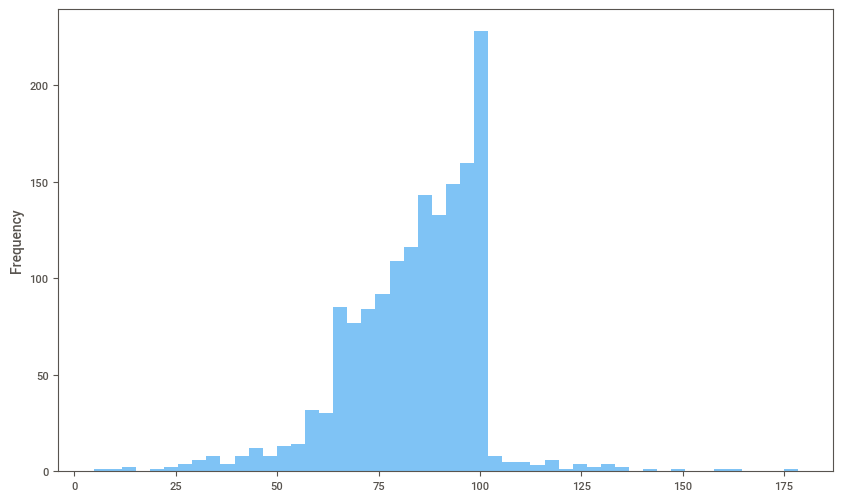

In [123]:
# Eliminate outliers from percentual_valor_final
df_plot = df_serpro_siasgnet.copy()
df_plot = df_plot[(df_plot['percentual_valor_final'] <= 200) & (df_plot['percentual_valor_final'] >= 1)]

# Calculate the mean of percentual_valor_final by mododisputa rounded to 2 decimal places
print(df_plot.groupby('mododisputa')['percentual_valor_final'].mean().round(2))
print(df_plot.groupby('disputaaberto')['percentual_valor_final'].mean().round(2))

# Calculate and plot the distribution of percentual_valor_final
df_plot['percentual_valor_final'].plot.hist(bins=50, figsize=(10,6), alpha=0.5)

                                             |          | [  0%]   00:00 -> (? left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



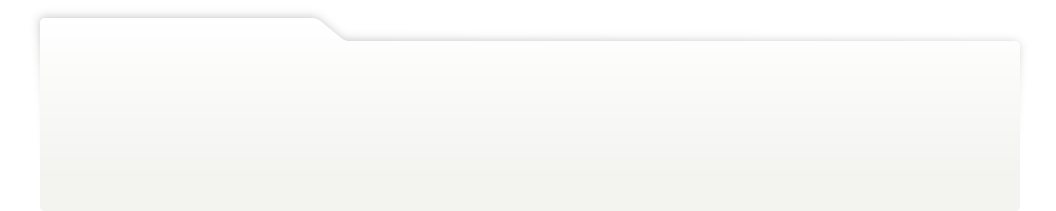
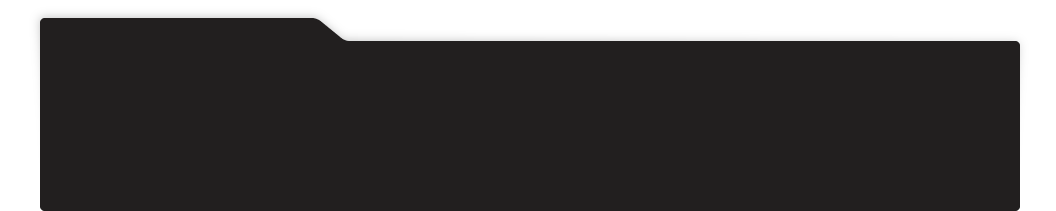
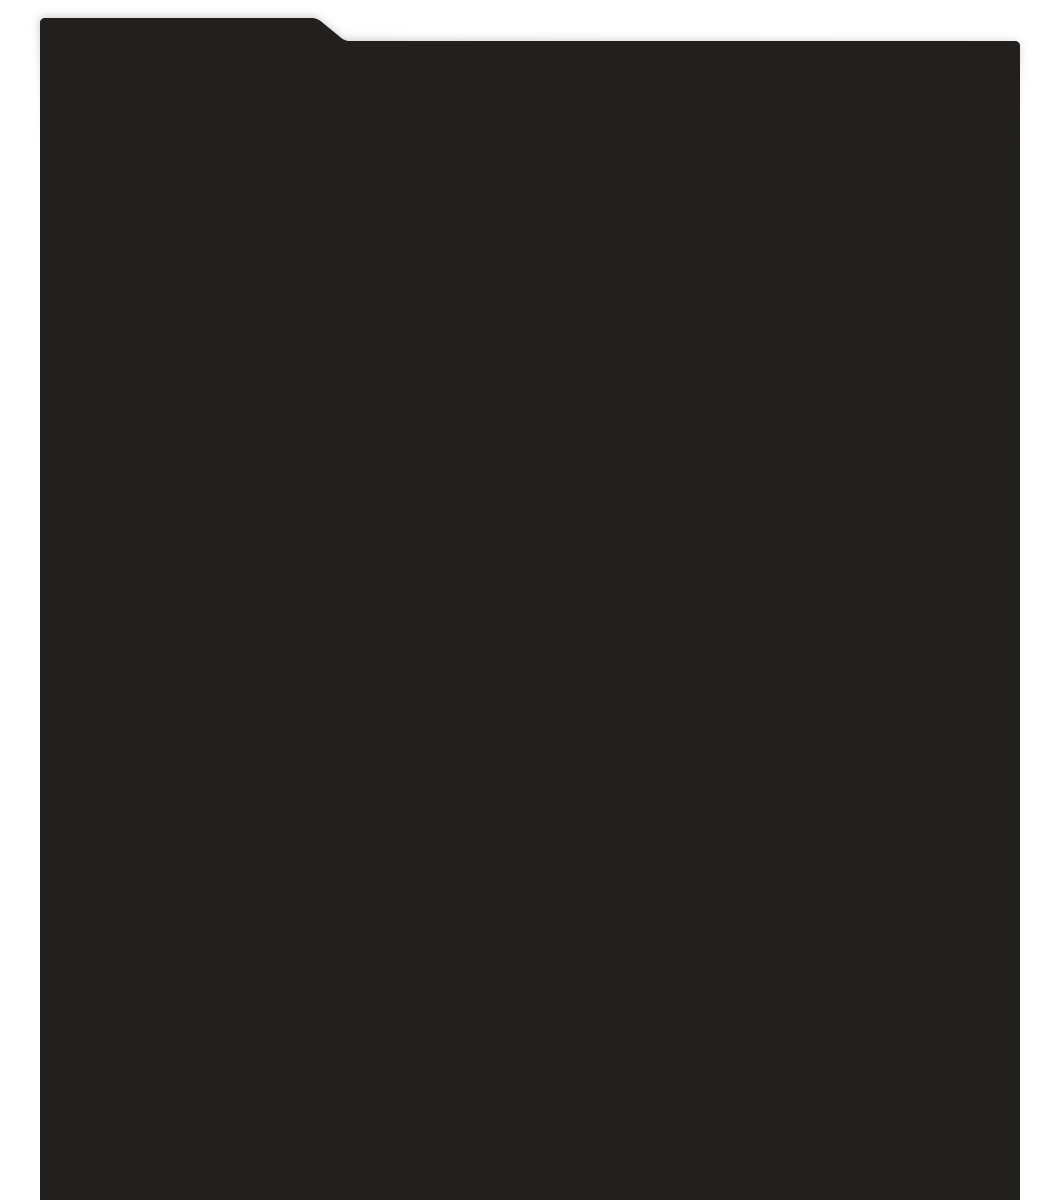
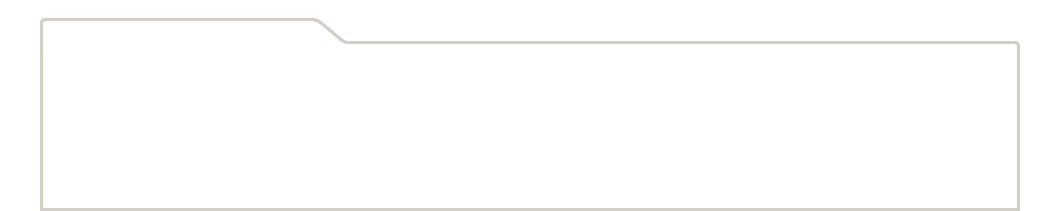
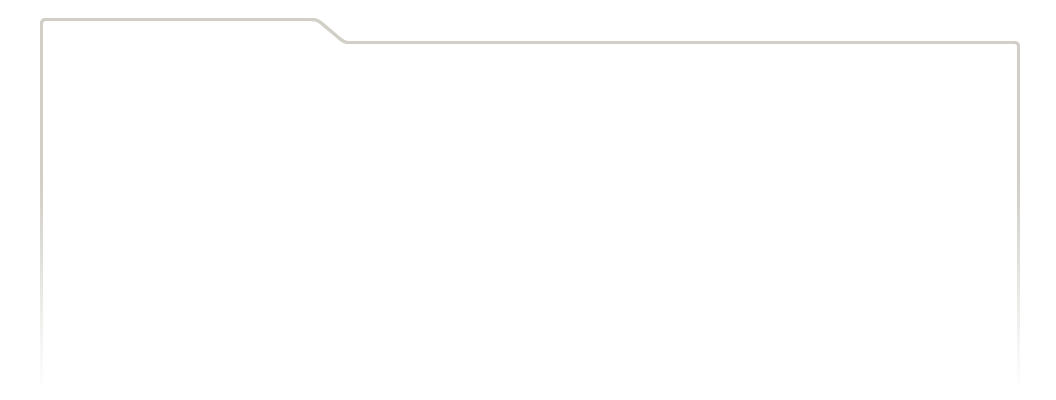
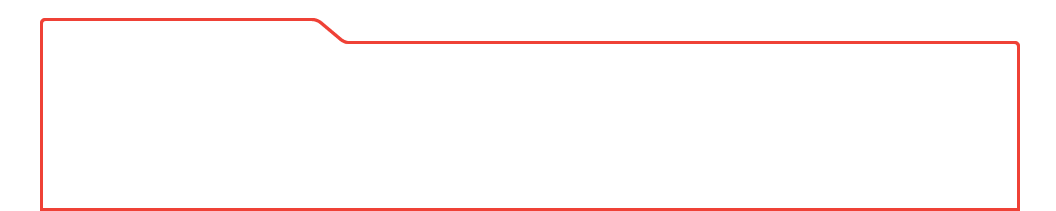
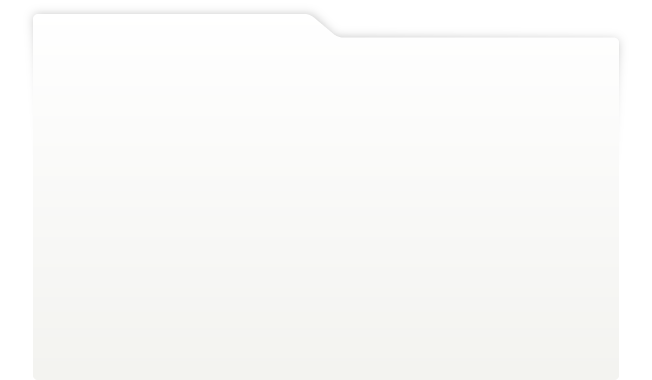
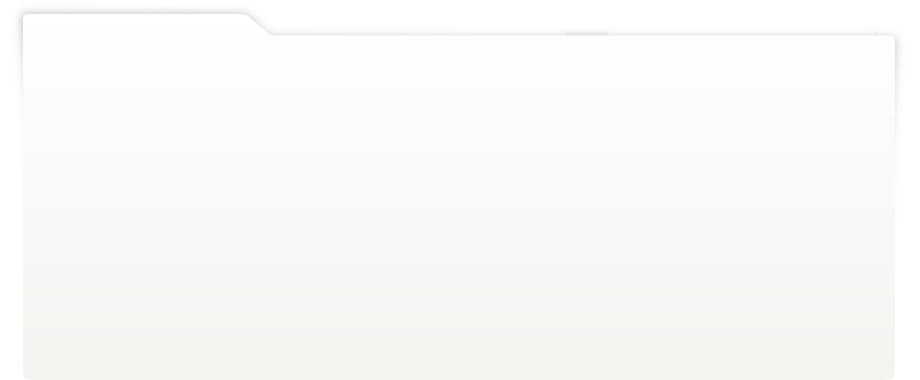
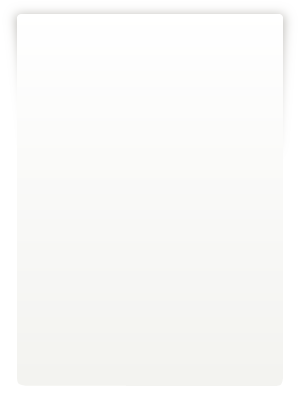
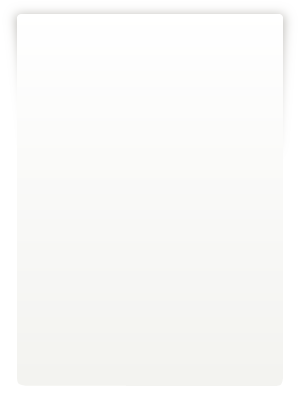
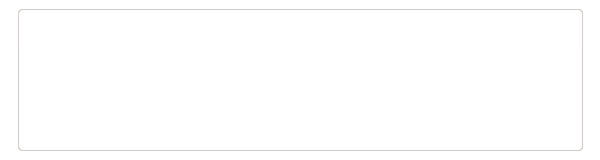
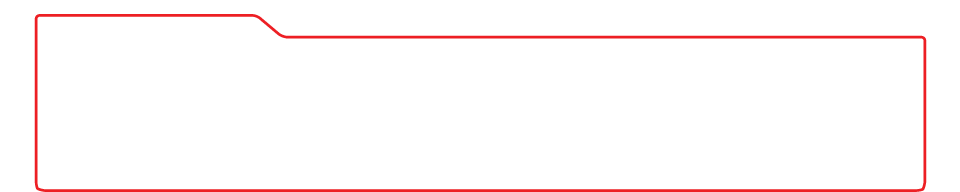
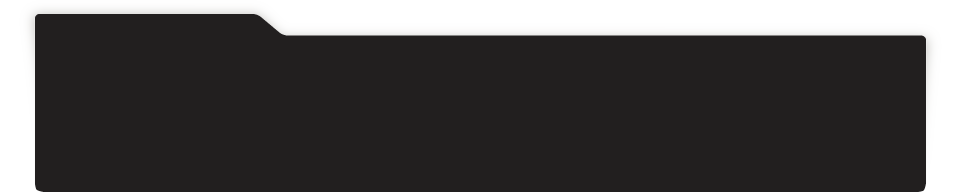
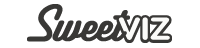
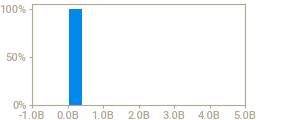
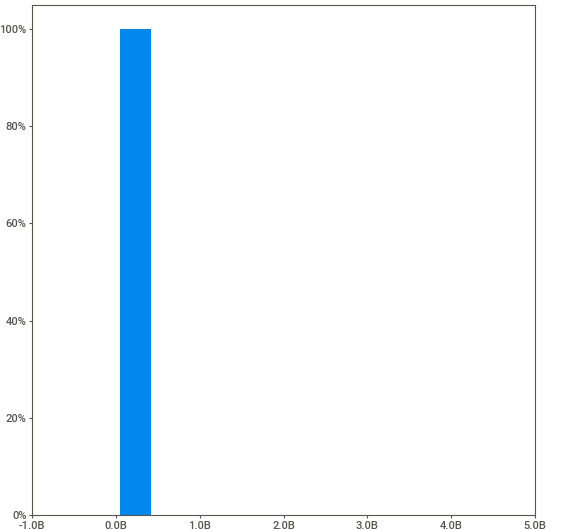
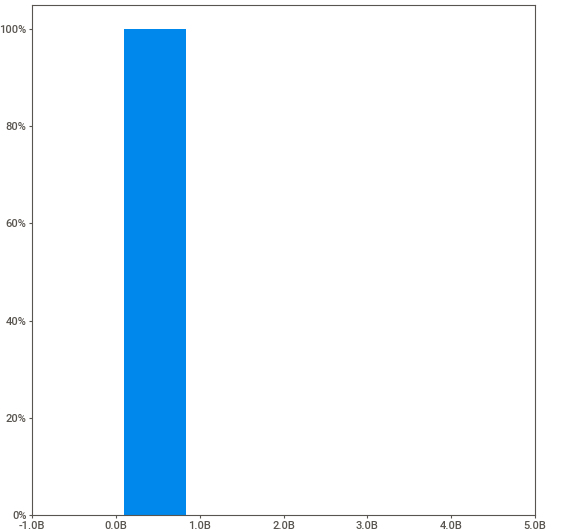
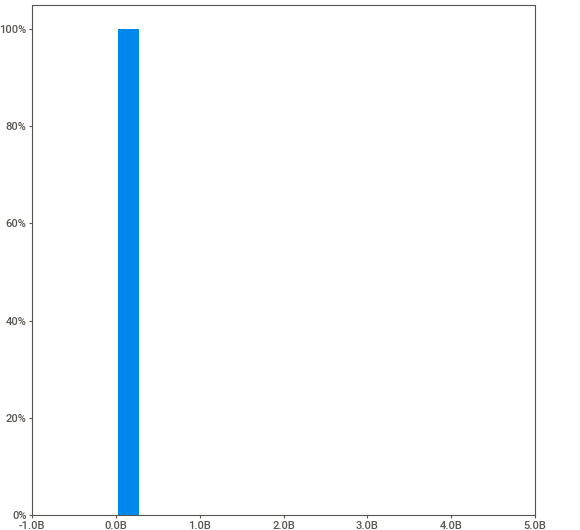
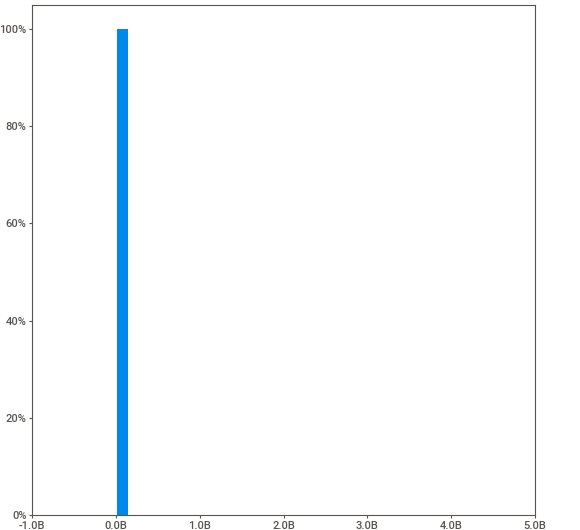
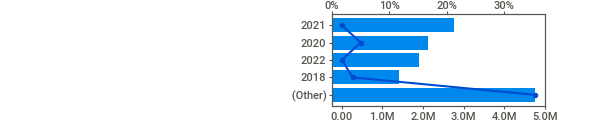
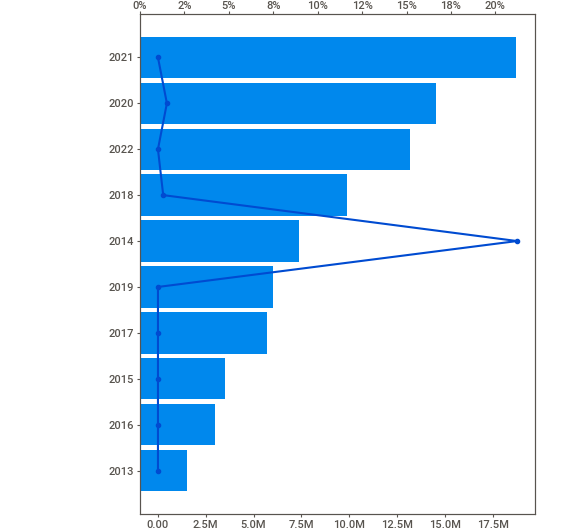
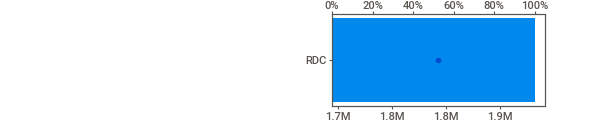
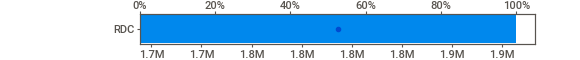
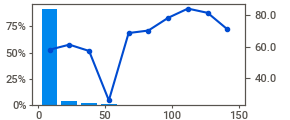
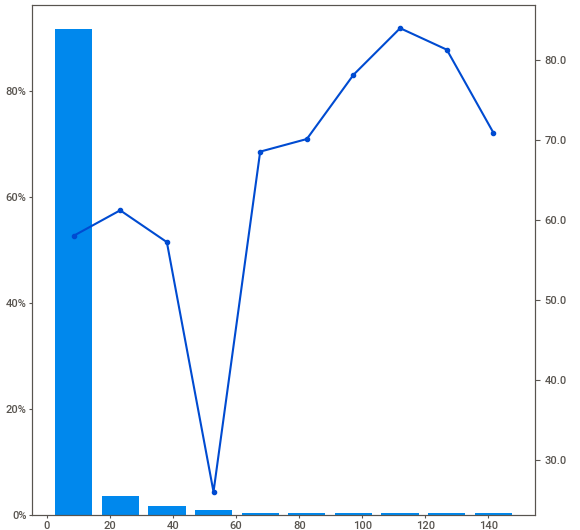
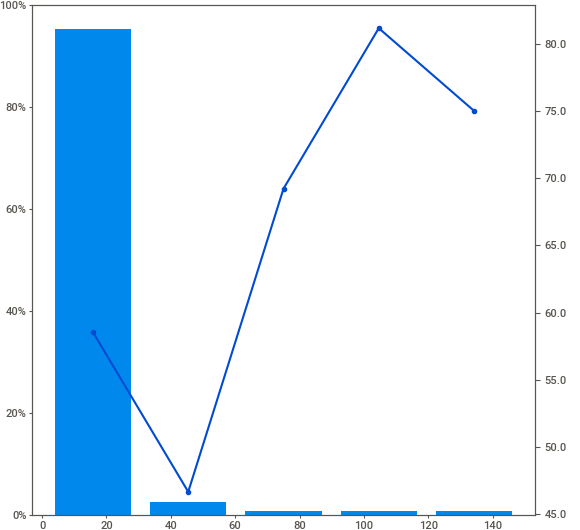
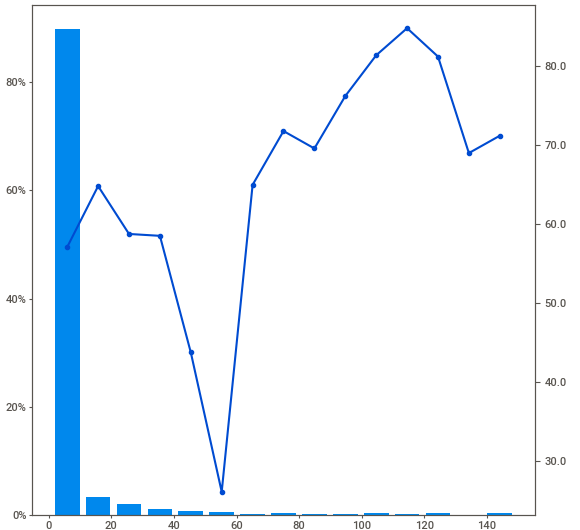
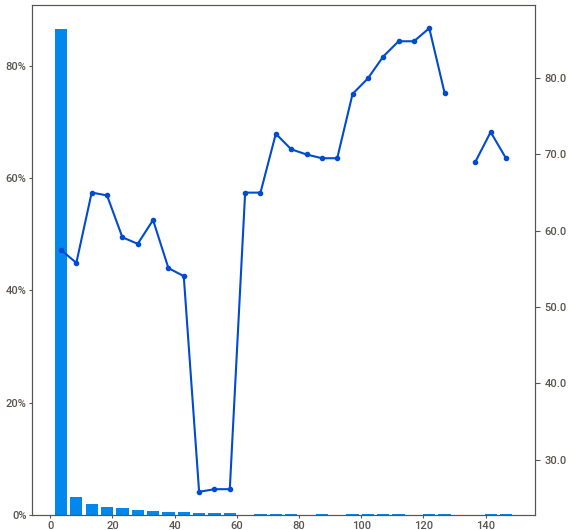
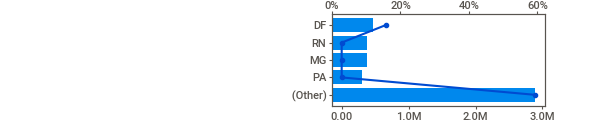
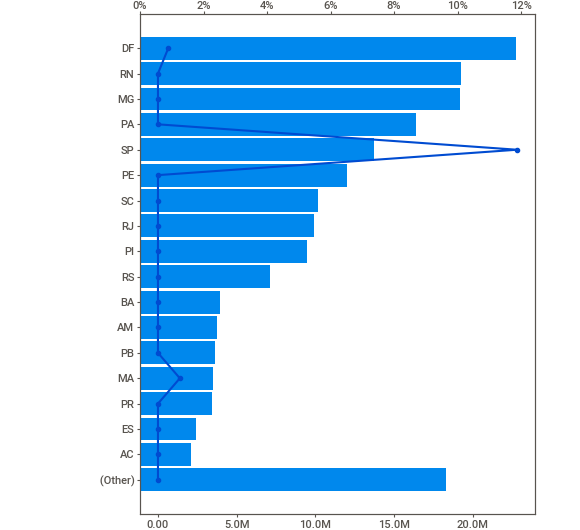
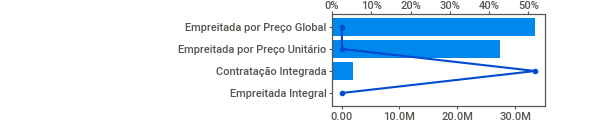
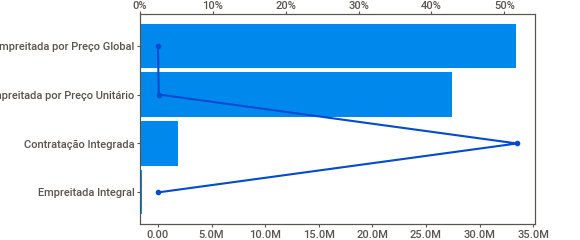
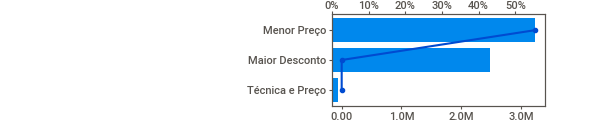
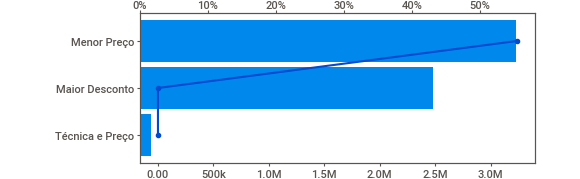
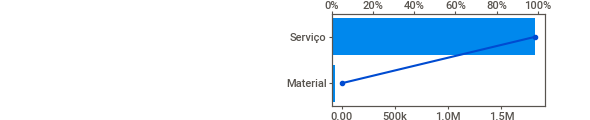
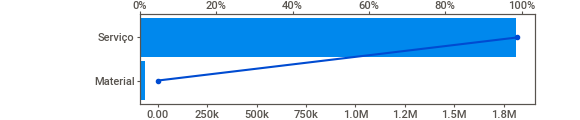
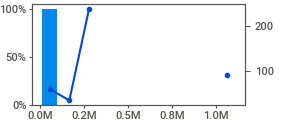
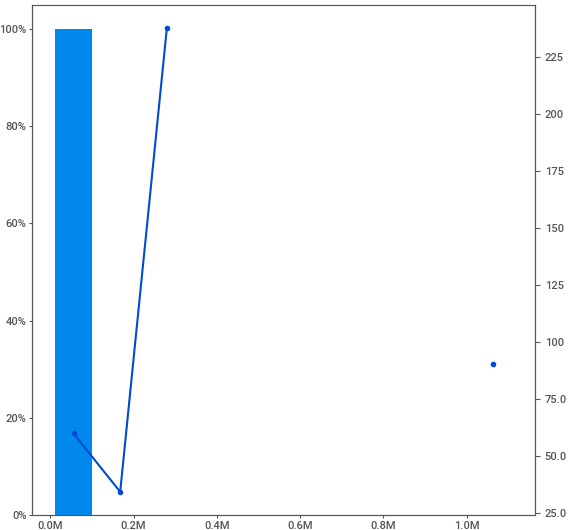
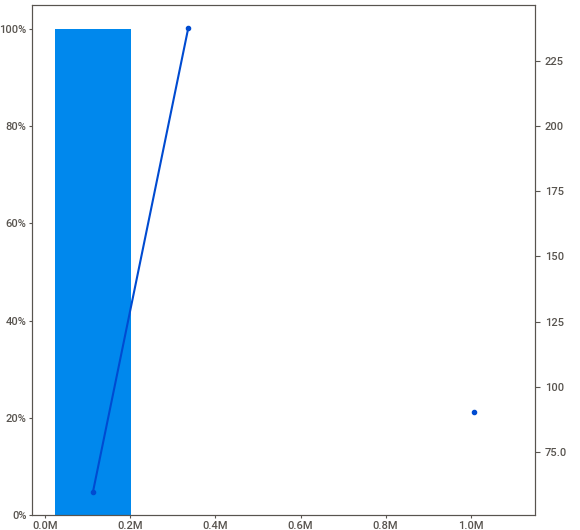
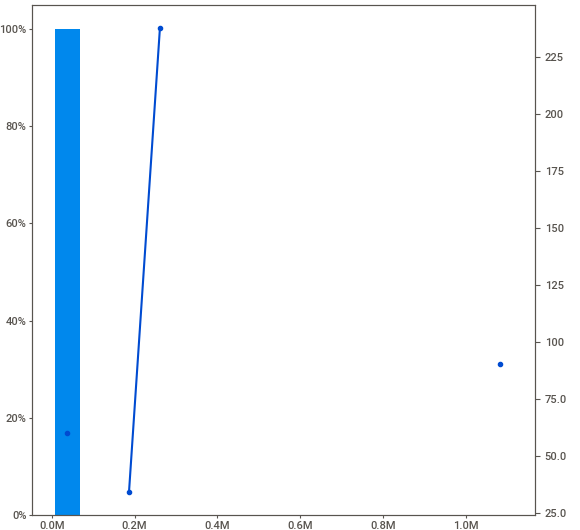
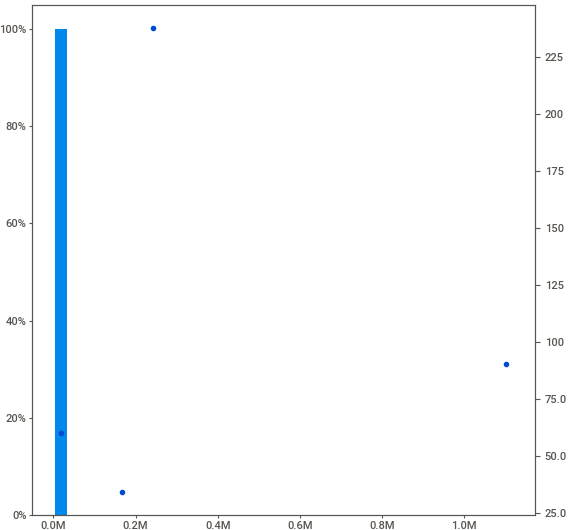
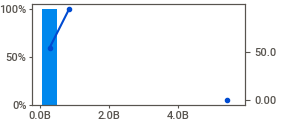
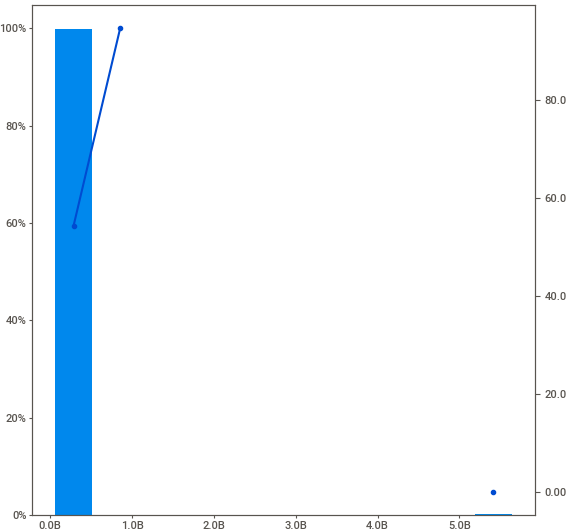
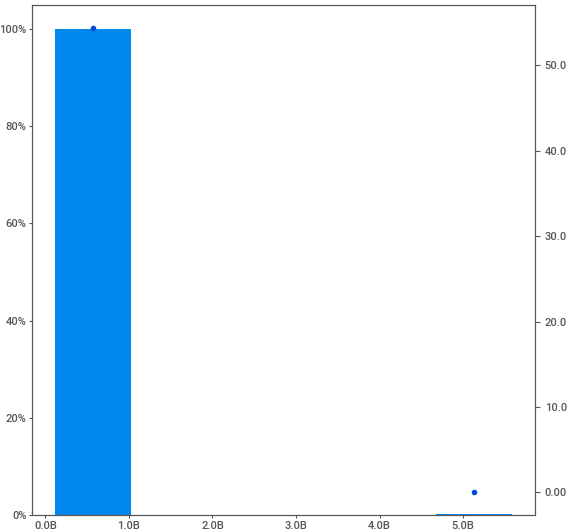
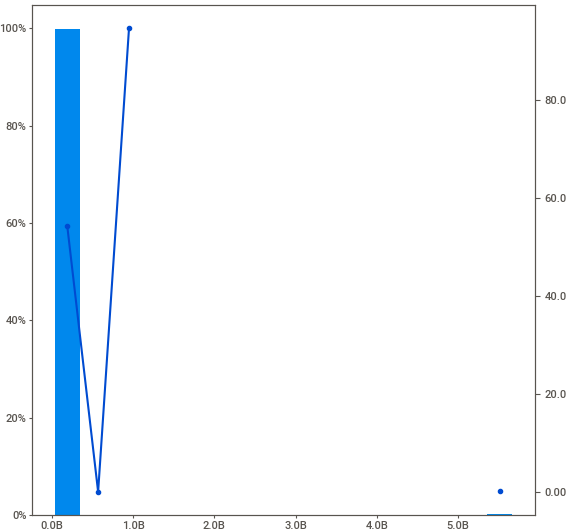
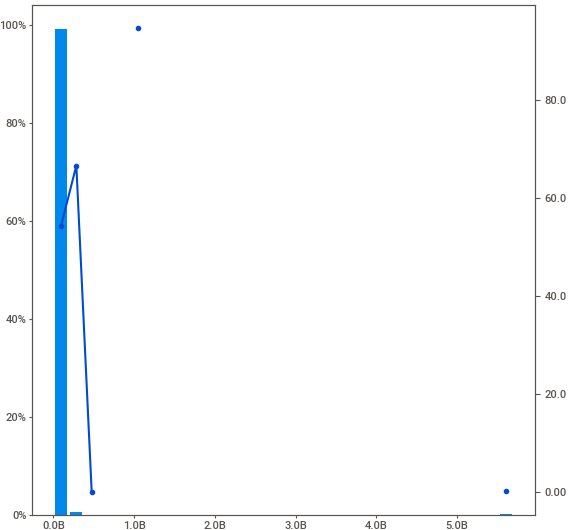
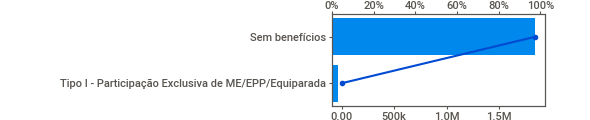
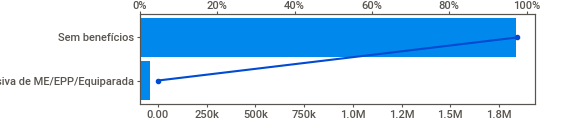
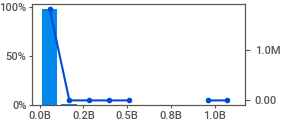
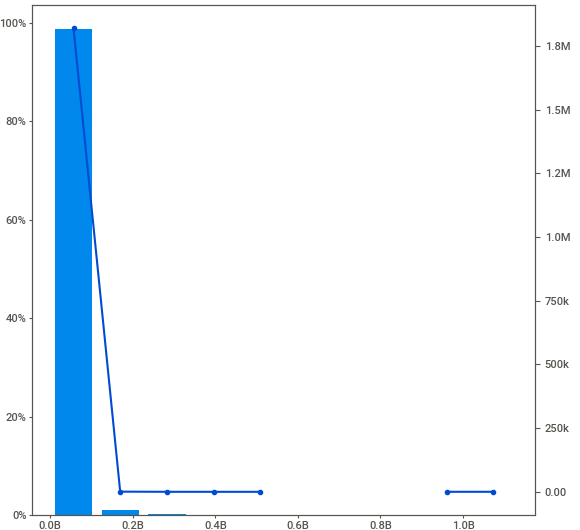
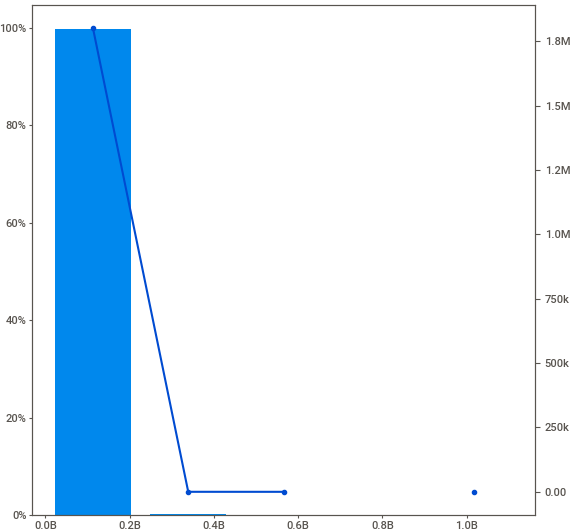
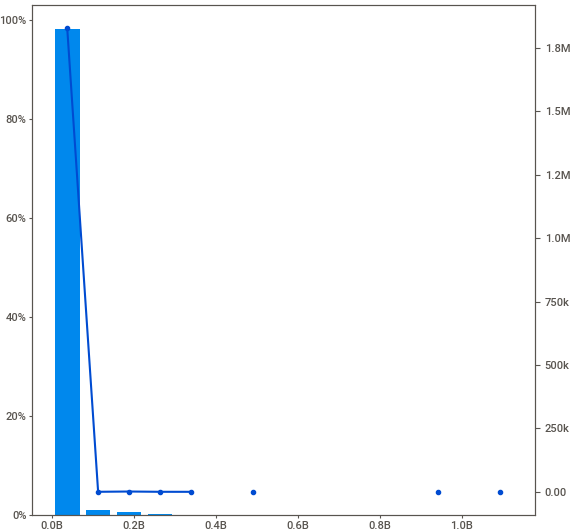
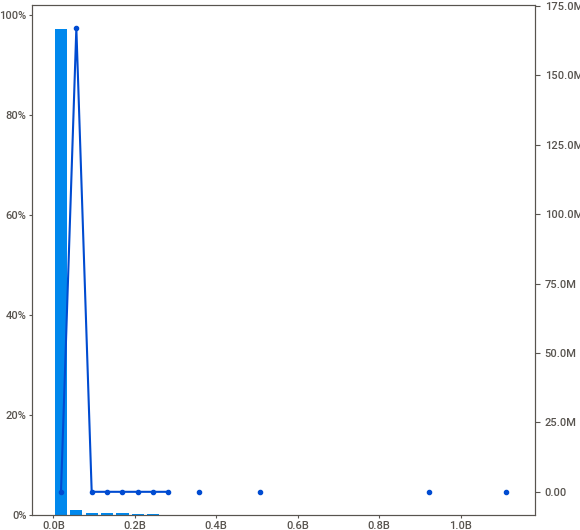
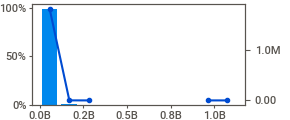
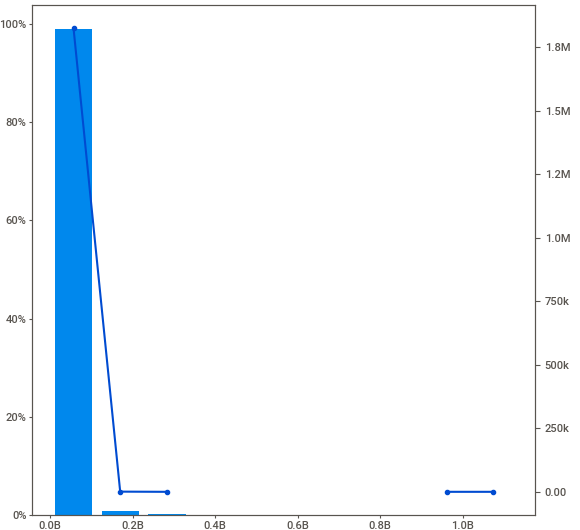
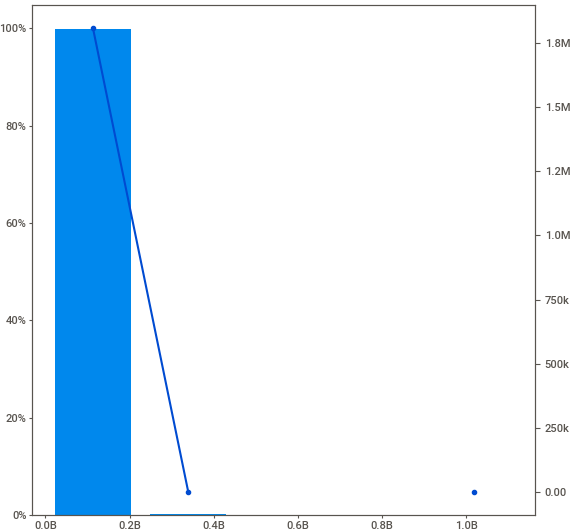
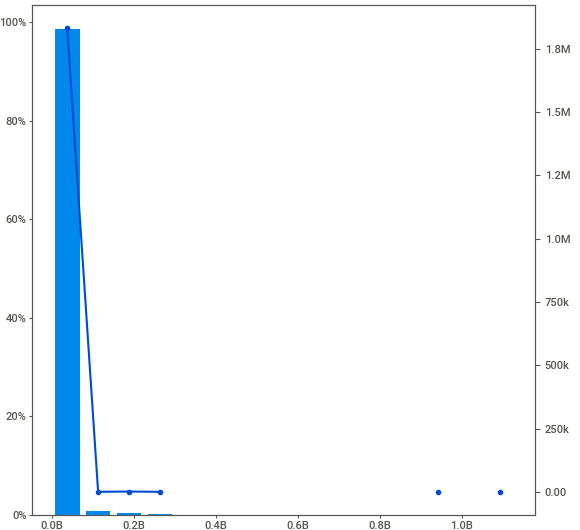
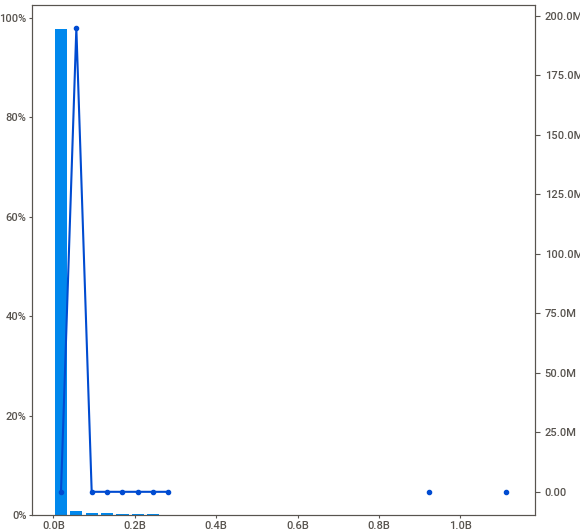
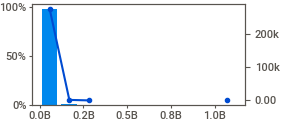
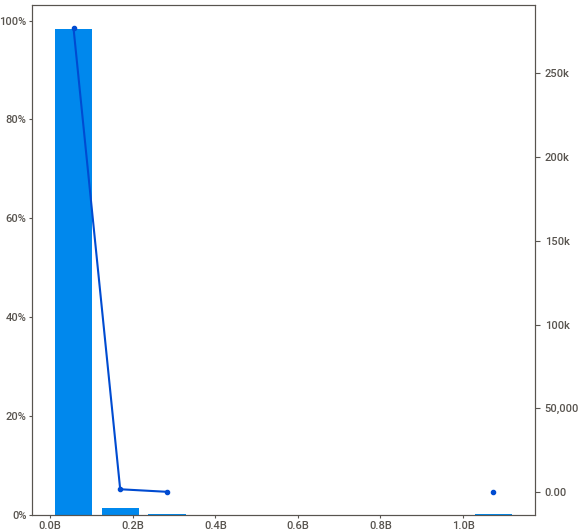
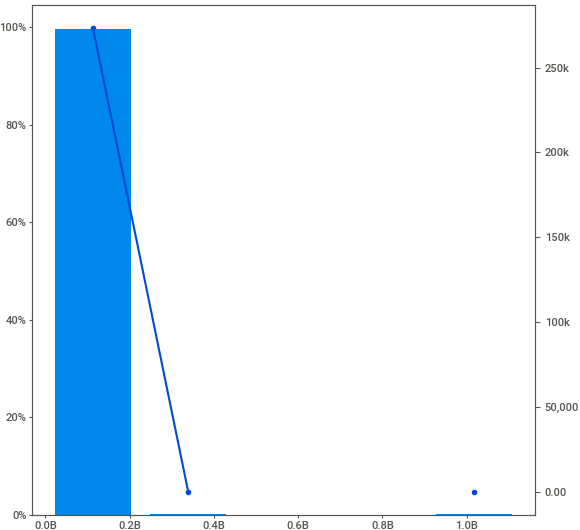
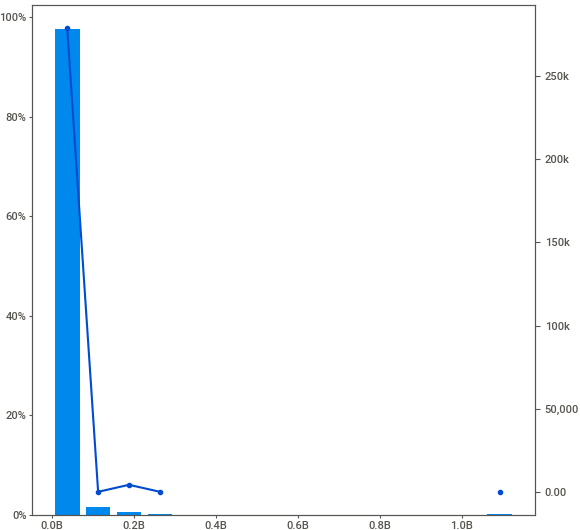
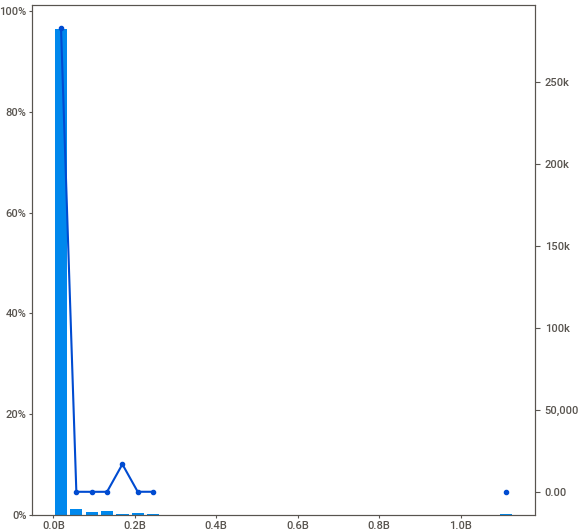
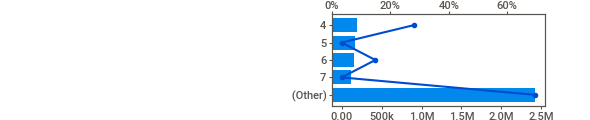
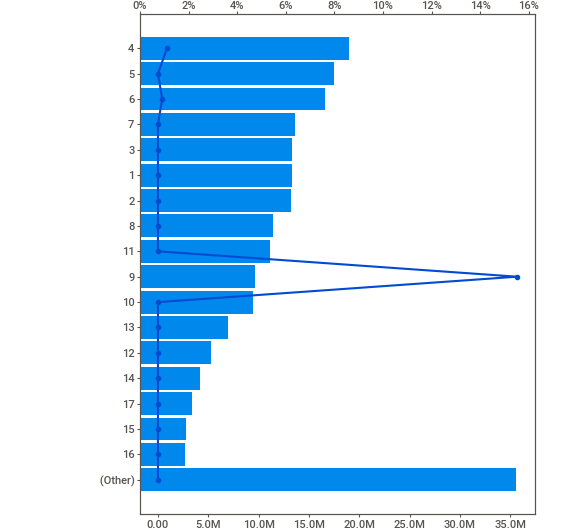
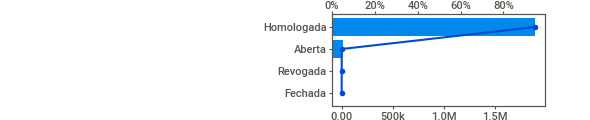
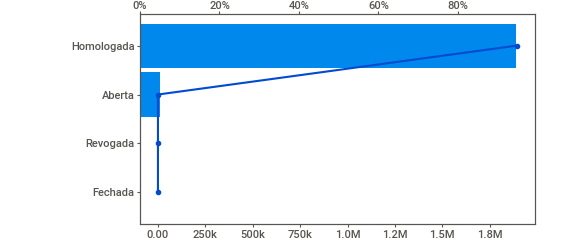
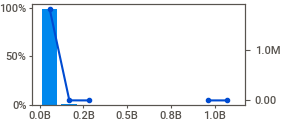
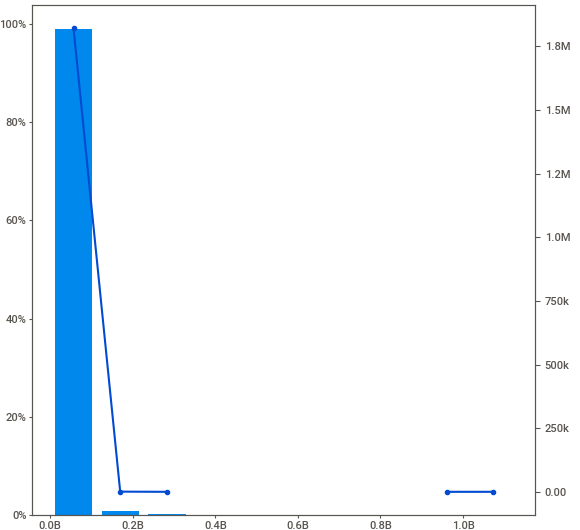
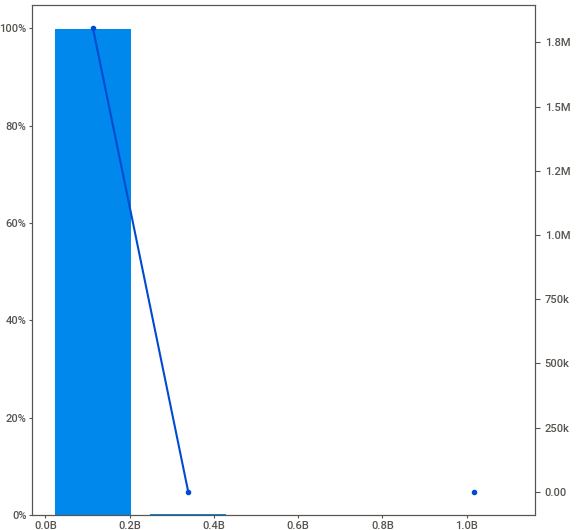
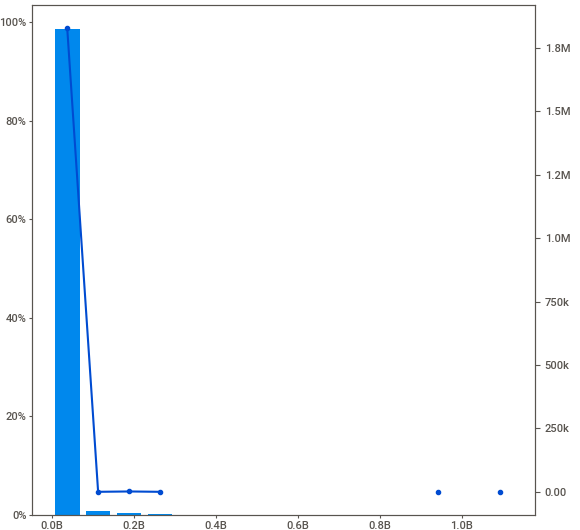
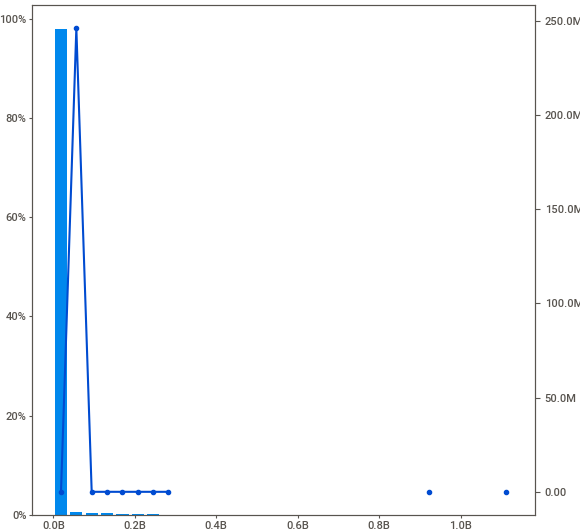
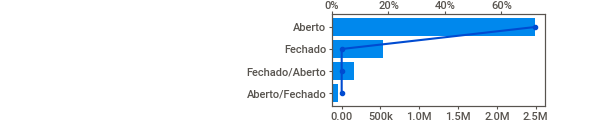
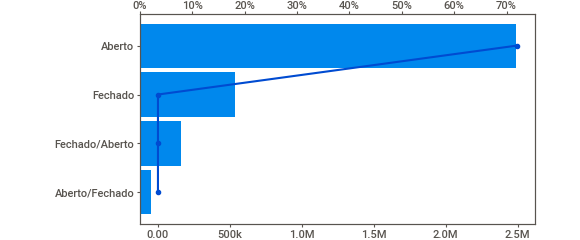
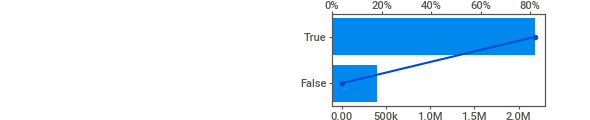
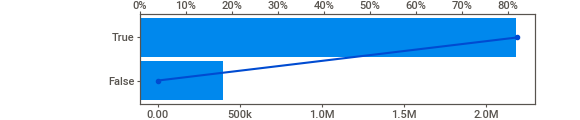
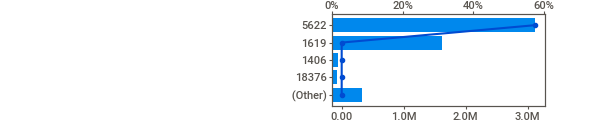
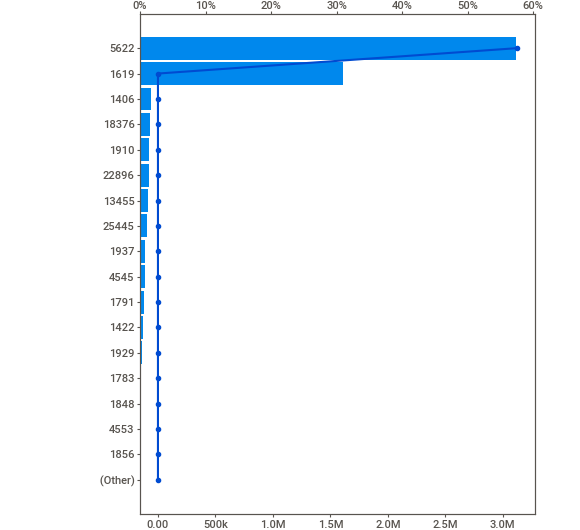
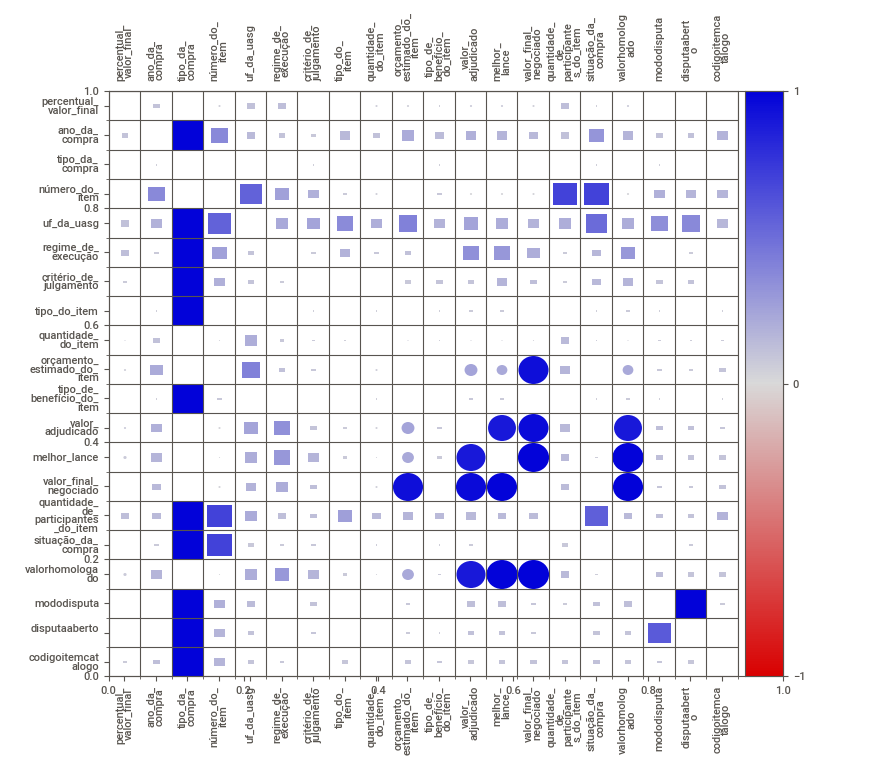
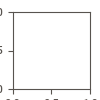

In [124]:
# SweetViz Setup
target_feature ='percentual_valor_final'
skip_features = [
    'unidade_de_fornecimento_do_item', 'link',
    'objeto_da_compra', 'grupo_do_item',
    'data_hora_da_primeira_publicação', 
    'data_hora_realização_do_certame_fim_proposta',
    'data_hora_de_homologação_da_compra',
    'data_hora_de_homologação_do_item',
    'nome_do_item', 'situação_do_item', 
    'identificação_do_fornecedor_vencedor_(adjudicado)',
    'uasg', 'compra', 'ano', 'codcompra',
    ]

feature_config = sv.FeatureConfig(skip=skip_features,
                                  force_cat=tuple([
                                      'mododisputa',
                                      'disputaaberto',
                                      ]),
                                  force_text=tuple([
                                      ]),
                                  force_num=tuple([
                                      ])
                                 ) # Possible parameters: skip, force_cat, force_num and force_text

my_report = sv.analyze(df_serpro_siasgnet, target_feat=target_feature, feat_cfg=feature_config)

# Export Report to HTML
my_report.show_html(filepath='sweetviz_report.html', 
                    open_browser=True, 
                    layout='vertical', 
                    scale=None)
                    
# Print Report to Notebook
my_report.show_notebook(w="100%",
                        h=None, 
                        scale=None, 
                        layout='vertical',
                        filepath=None)

In [125]:
# Export dataframe to CSV and Excel, all quoted
filename = 'output/extracao-rdc-serpro-siasgnet'
df_serpro_siasgnet.to_csv(f'{filename}.csv', index=False, quoting=1)
df_serpro_siasgnet.to_excel(f'{filename}.xlsx', index=False)

In [165]:
# Read the data at data/2023-09-29-extracao-rdc.ods
df_contratos = pd.read_excel('data/comprasnet_contratos.xlsx', dtype={'codcompra': str})
df_contratos_original = df_contratos.copy()
df_contratos.head()

,codcompra,aditivos,vigencia_inicio,vigencia_fim,anos,valor_inicial,valor_global,diferenca_valor
0,11032299000012020,3,2020-09-01,2022-06-23,2.0,1552999.99,1888599.01,-335599.02
1,11540699019142018,6,2018-12-05,2023-12-05,5.0,0.00,0.00,0.00
2,15014999000012020,2,2020-07-15,2021-02-08,1.0,156000.00,179116.09,-23116.09
3,15014999000022020,2,2020-10-05,2021-07-17,1.0,488993.25,488993.25,0.00
4,15018299000012019,5,2019-04-25,2021-11-24,2.0,91970.16,110494.96,-18524.80


In [191]:
df_contratos = df_contratos_original.copy()
df_contratos['percentual_diferenca_valor'] = df_contratos['diferenca_valor'] / df_contratos['valor_inicial'] * 100
df_contratos = df_contratos[~df_contratos['percentual_diferenca_valor'].isin([-np.inf, np.inf])]

In [192]:
print(df_contratos['percentual_diferenca_valor'])

0      -21.609725
1             NaN
2      -14.818006
3        0.000000
4      -20.142185
          ...    
1678     0.000000
1679   -22.610496
1680     0.000000
1681     0.000000
1682     0.000000
Name: percentual_diferenca_valor, Length: 1673, dtype: float64


In [193]:
df_contratos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1673 entries, 0 to 1682
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   codcompra                   1673 non-null   object        
 1   aditivos                    1673 non-null   int64         
 2   vigencia_inicio             1673 non-null   datetime64[ns]
 3   vigencia_fim                1672 non-null   datetime64[ns]
 4   anos                        1672 non-null   float64       
 5   valor_inicial               1673 non-null   float64       
 6   valor_global                1673 non-null   float64       
 7   diferenca_valor             1673 non-null   float64       
 8   percentual_diferenca_valor  1666 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(1)
memory usage: 130.7+ KB


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



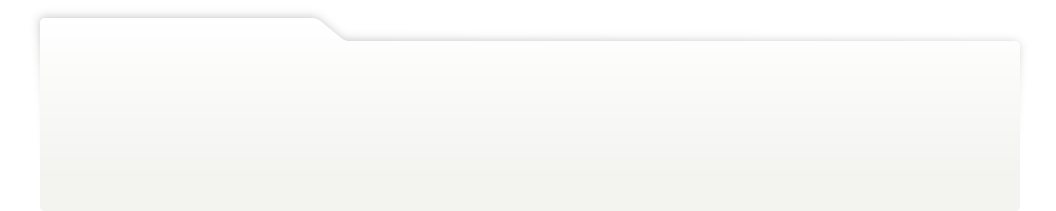
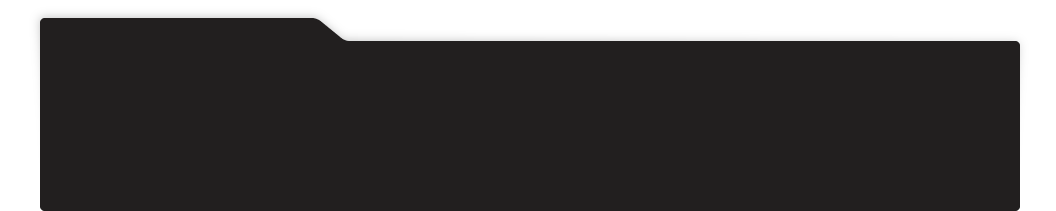
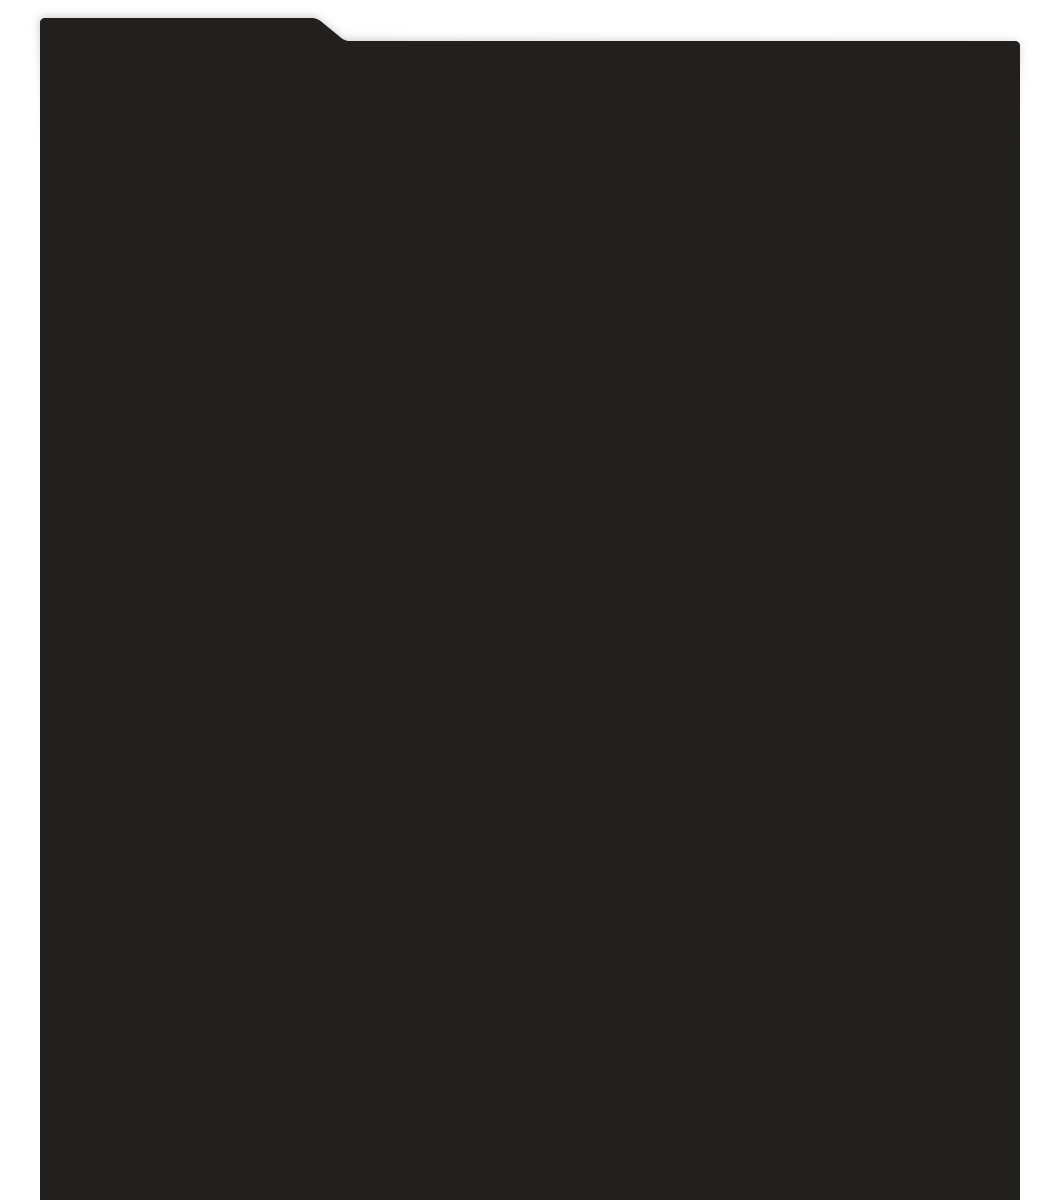
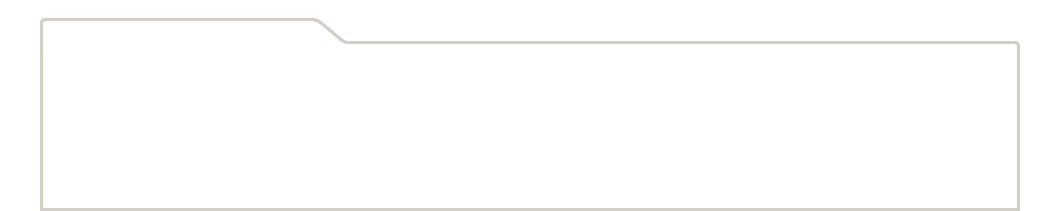
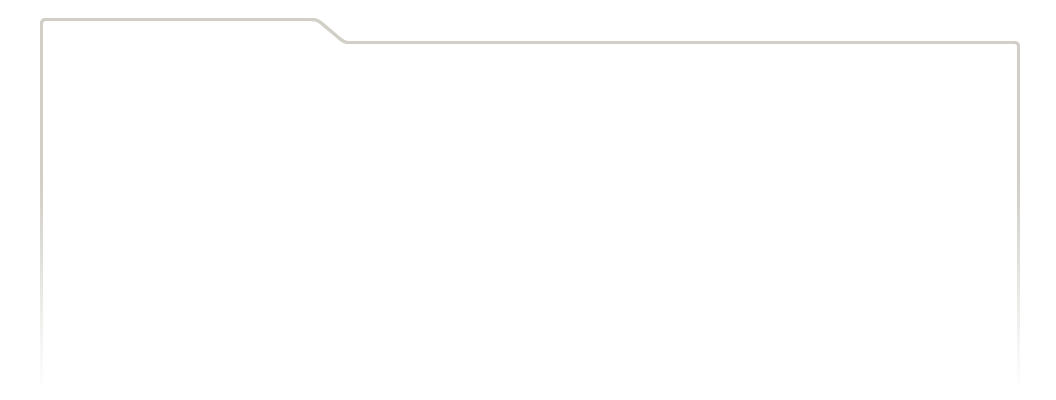
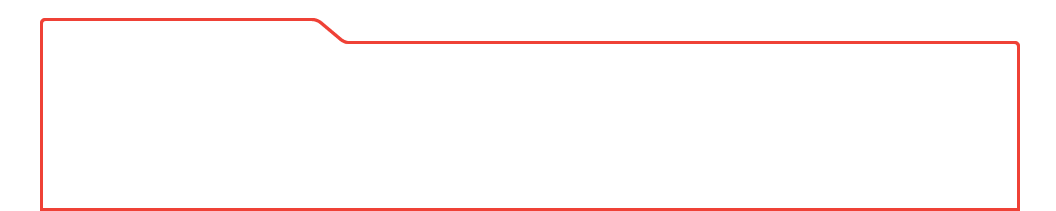
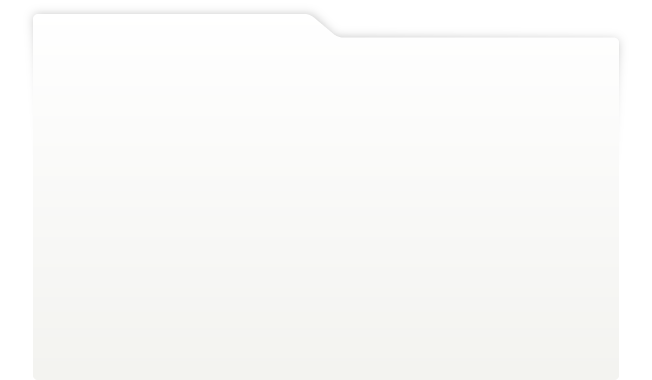
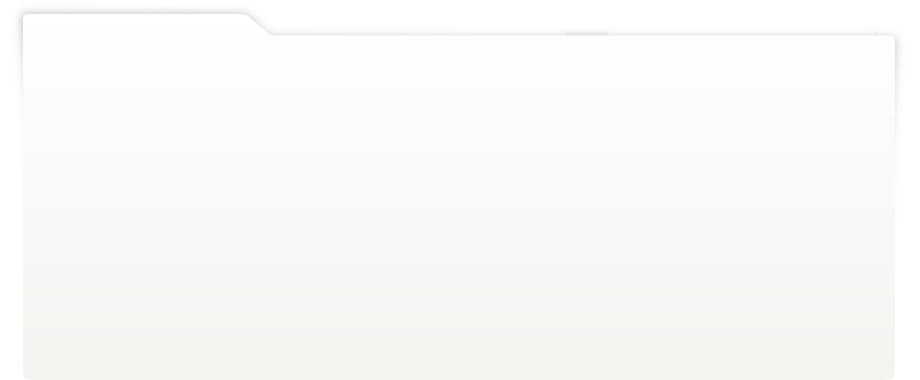
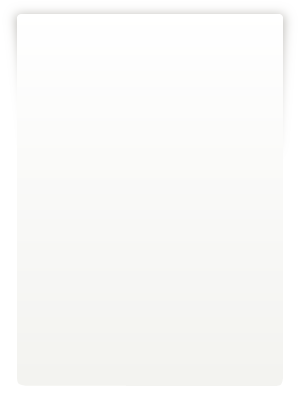
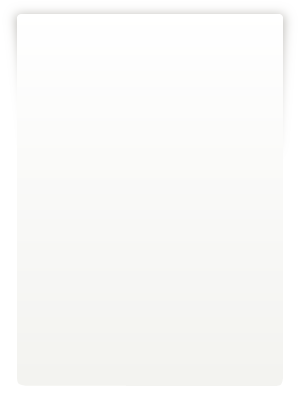
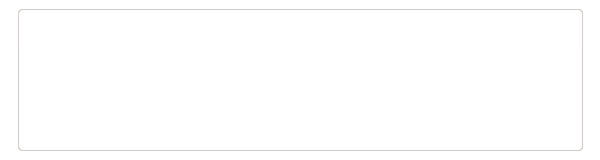
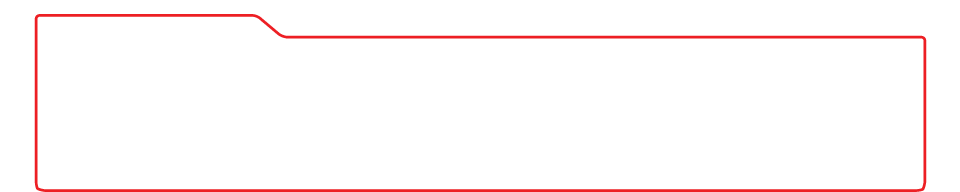
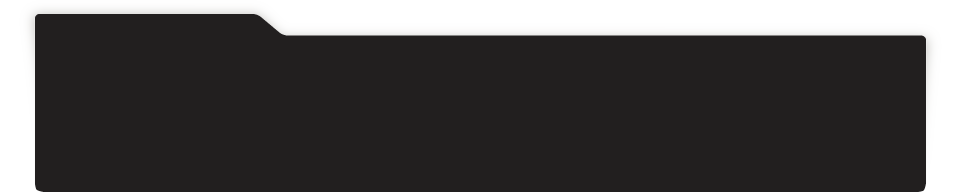
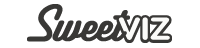
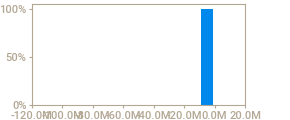
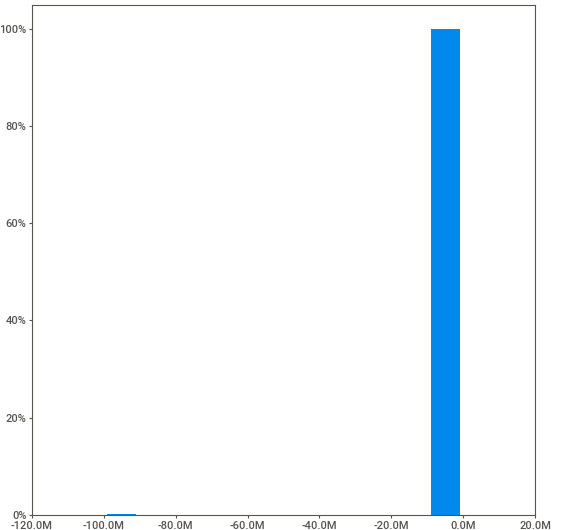
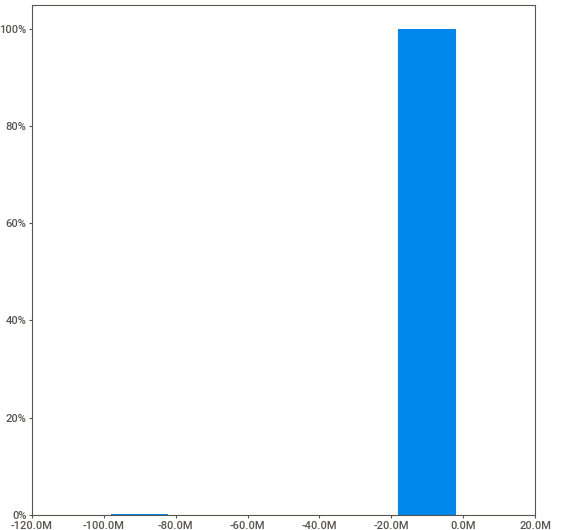
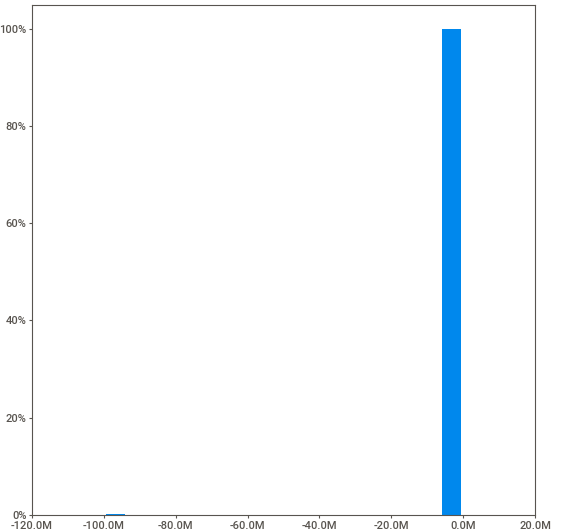
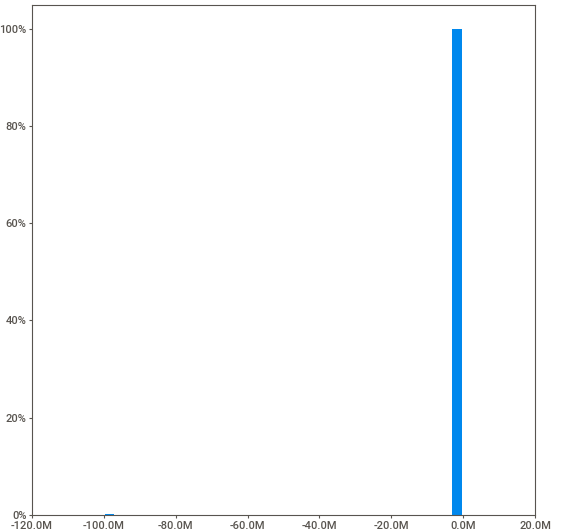
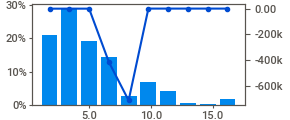
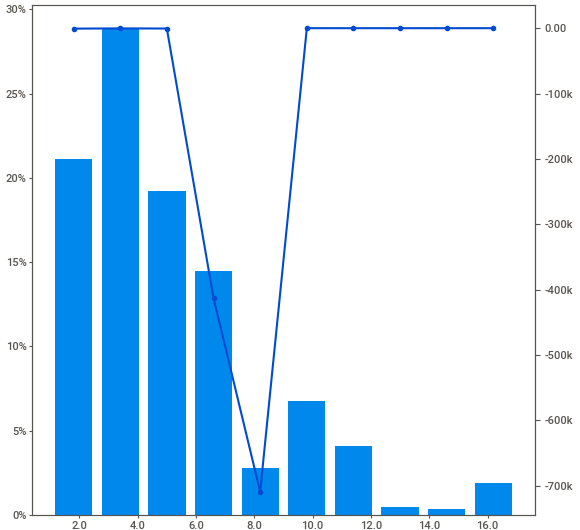
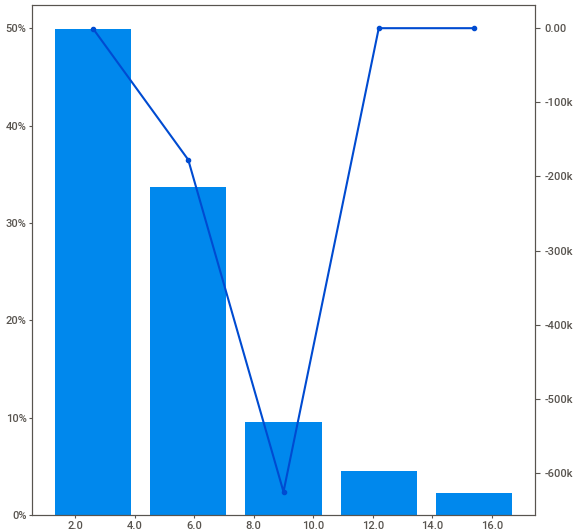
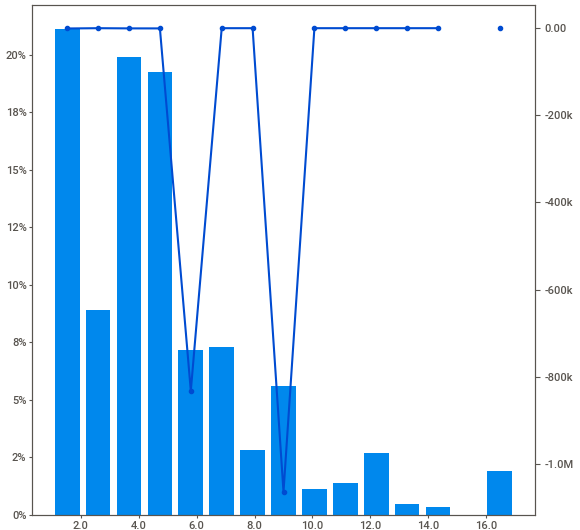
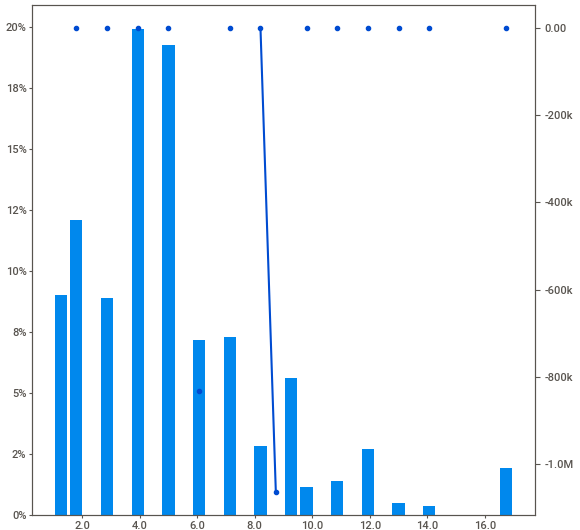
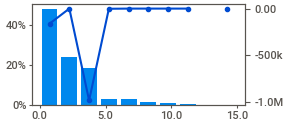
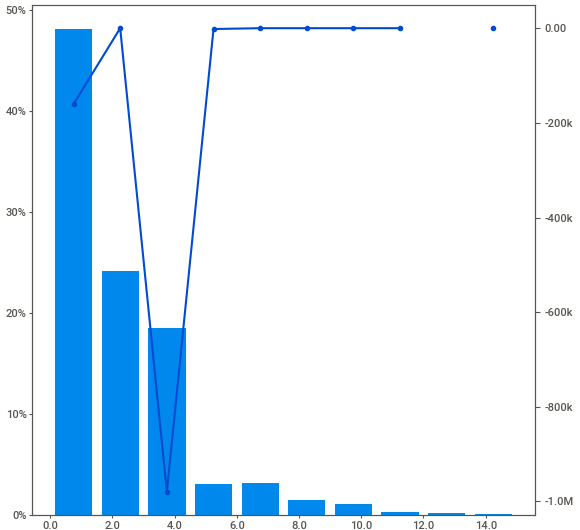
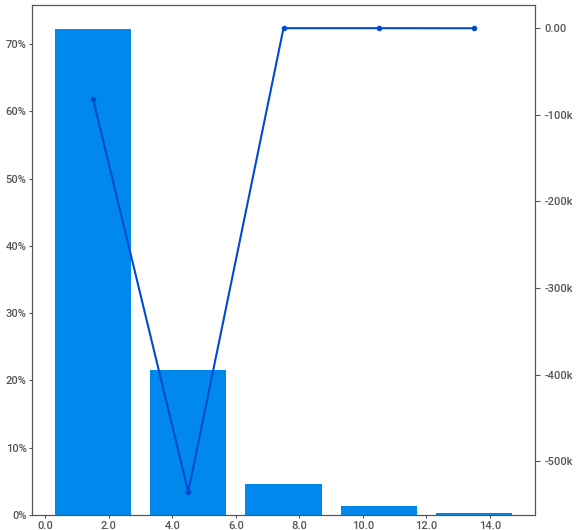
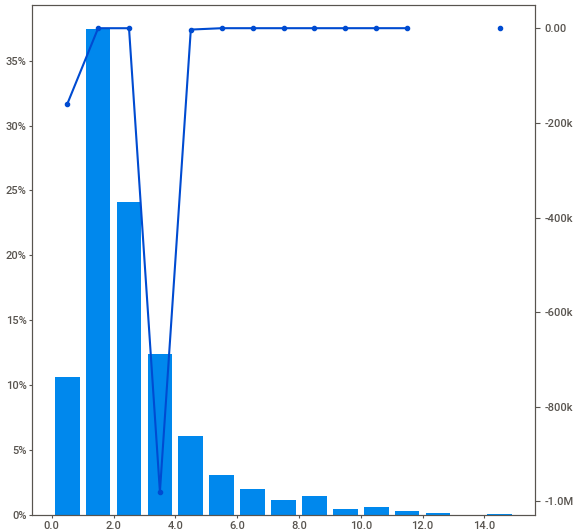
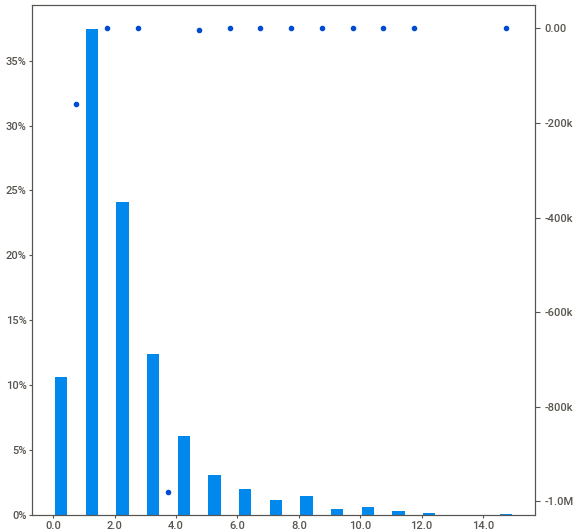
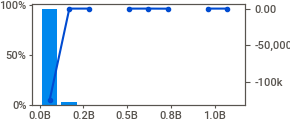
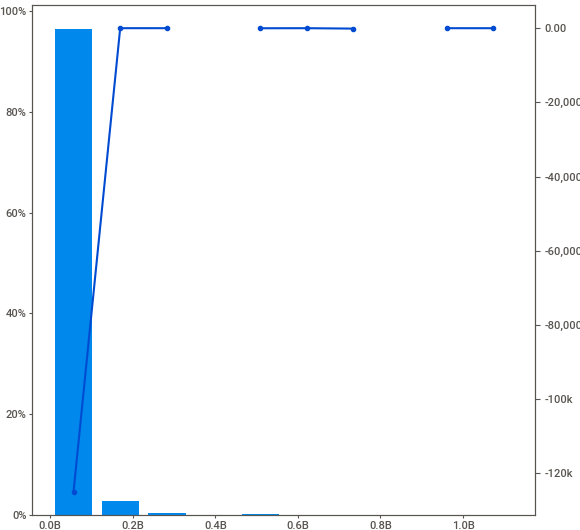
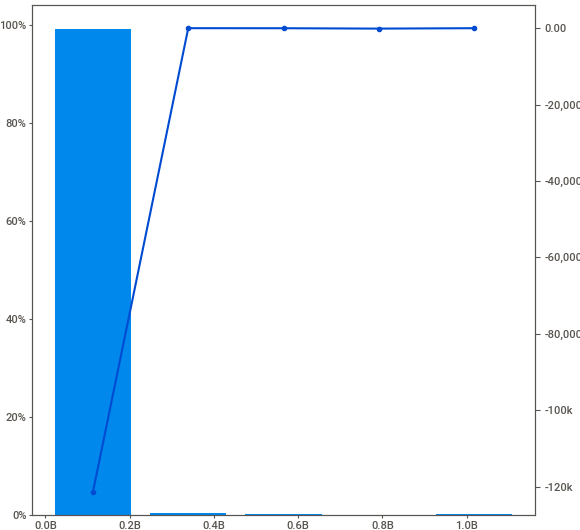
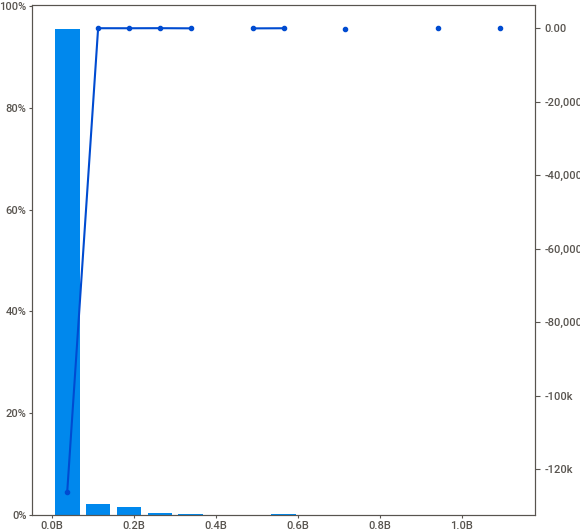
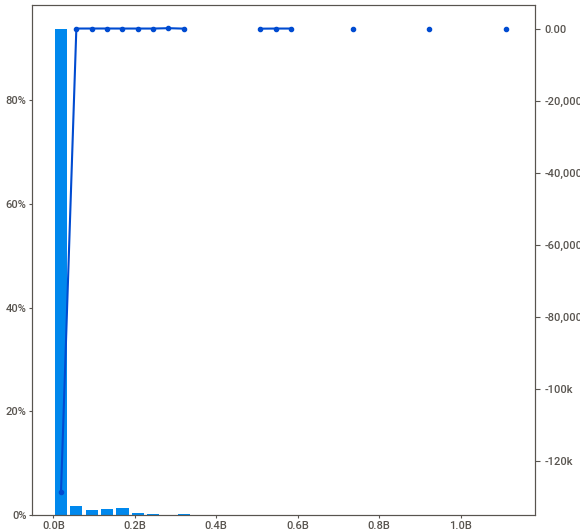
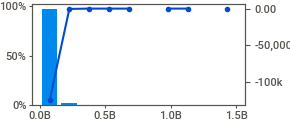
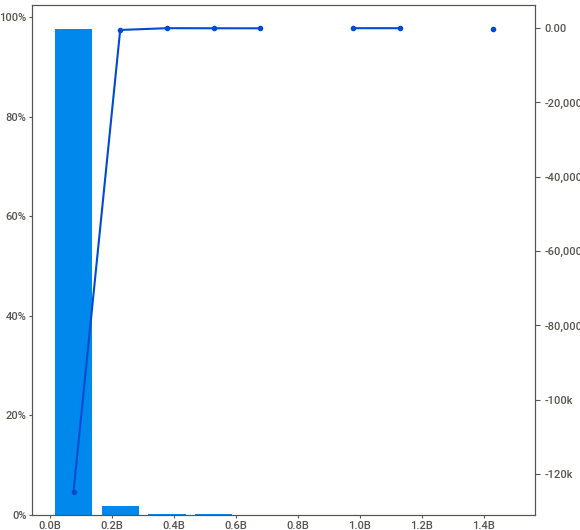
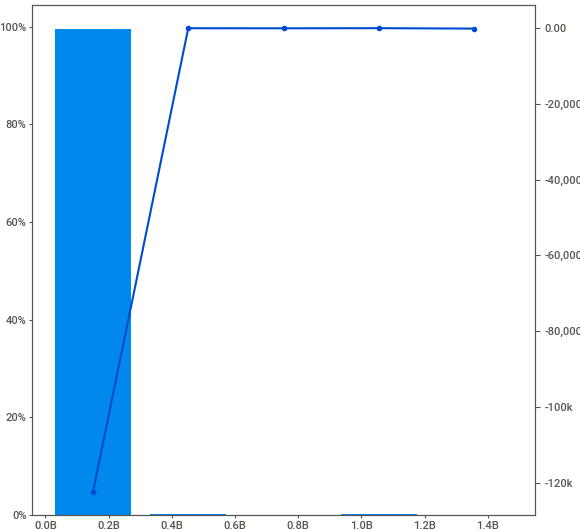
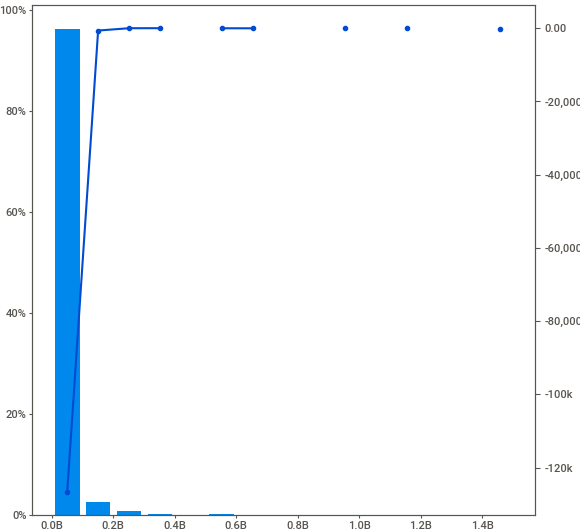
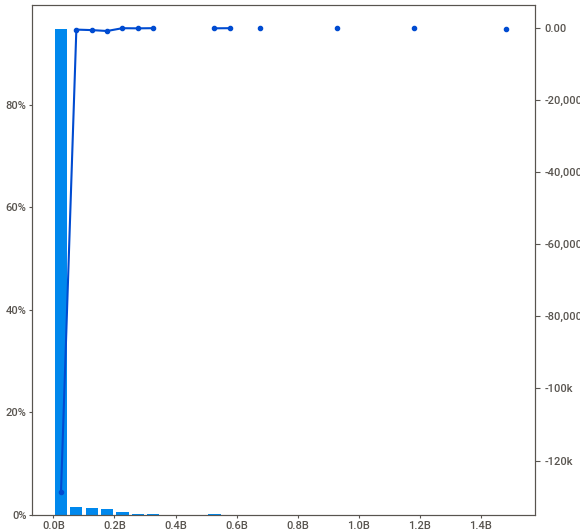
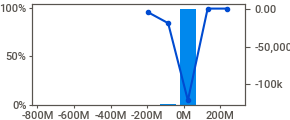
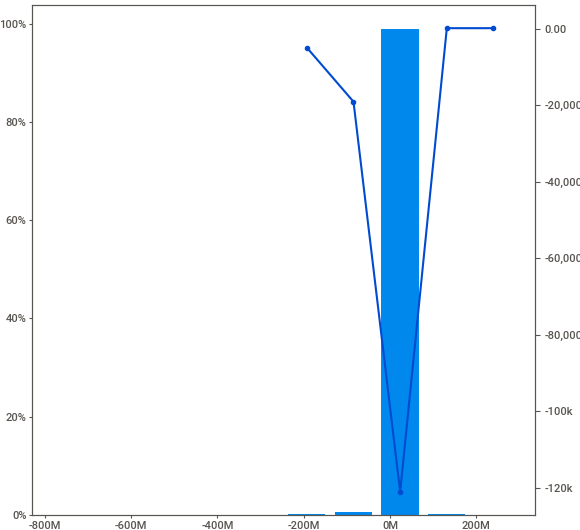
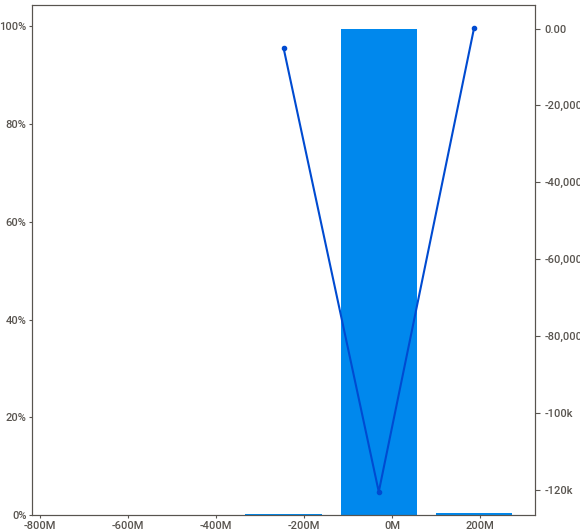
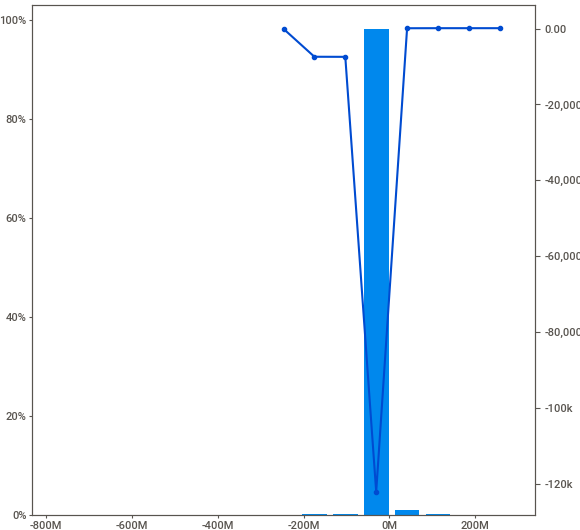
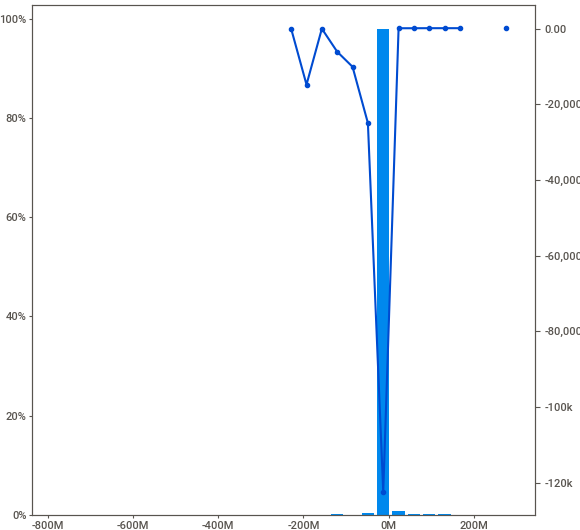
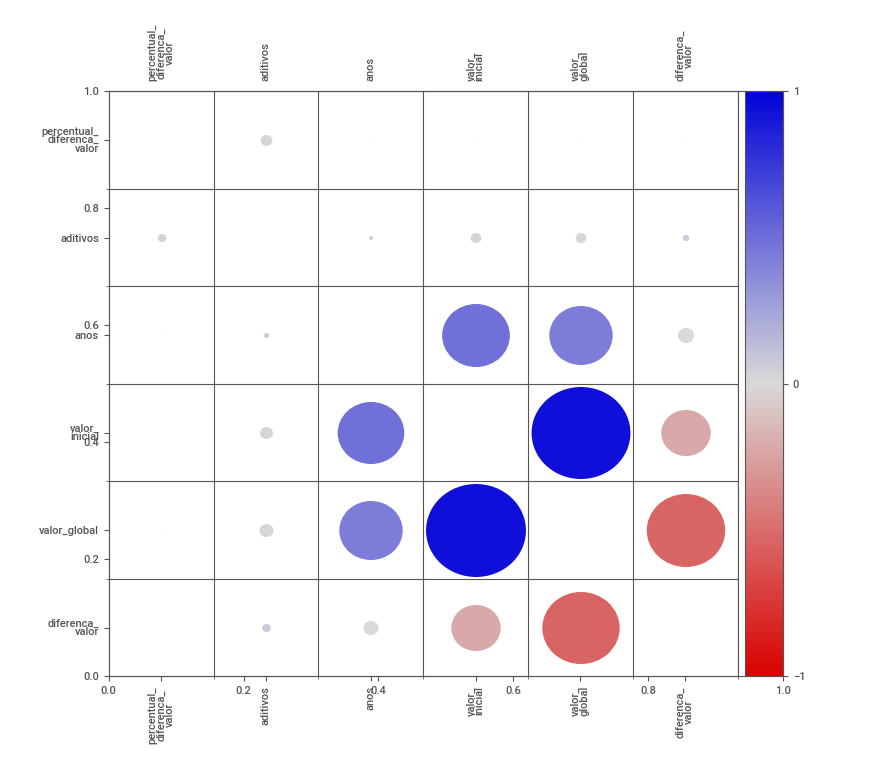
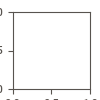

In [194]:
df_sweetviz = df_contratos.copy()

# Replace NaN values with 0
df_sweetviz.fillna(0, inplace=True)

# SweetViz Setup
target_feature ='percentual_diferenca_valor'
skip_features = ['vigencia_fim']

feature_config = sv.FeatureConfig(skip=skip_features,
                                  force_cat=tuple([
                                      ]),
                                  force_text=tuple([
                                      ]),
                                  force_num=tuple([
                                      ])
                                 ) # Possible parameters: skip, force_cat, force_num and force_text

my_report = sv.analyze(df_sweetviz, target_feat=target_feature, feat_cfg=feature_config)

# Export Report to HTML
# my_report.show_html(filepath='sweetviz_report_contratos.html', 
#                     open_browser=True, 
#                     layout='vertical', 
#                     scale=None)
                    
# Print Report to Notebook
my_report.show_notebook(w="100%",
                        h=None, 
                        scale=None, 
                        layout='vertical',
                        )


In [195]:
# Concatenate df_serpro with df_siasgnet.mododisputa using codcompra as key with distinct values of df_serpro_siasgnet['codcompra']
df_aditivos = pd.merge(
    df_serpro_siasgnet[['codcompra', 'mododisputa', 'disputaaberto']].drop_duplicates(), 
    df_contratos, 
    how='inner', 
    on='codcompra'
    )

print(df_aditivos.shape)
df_aditivos

(521, 11)


,codcompra,mododisputa,disputaaberto,aditivos,vigencia_inicio,vigencia_fim,anos,valor_inicial,valor_global,diferenca_valor,percentual_diferenca_valor
0,15441999000052013,Aberto,True,17,2014-02-05,2021-03-31,7.0,4400000.00,4400000.00,0.00,0.000000
1,15809299000042014,Aberto,True,1,2016-04-19,2021-10-11,5.0,6468407.43,6468407.43,0.00,0.000000
2,15813699000022014,Fechado/Aberto,True,7,2015-02-12,2022-03-30,7.0,27586169.56,27586169.56,0.00,0.000000
3,39300999002742014,Aberto,True,3,2017-06-01,2024-05-18,7.0,24200000.00,11427702.37,12772297.63,52.778089
4,39301399002252014,Aberto,True,4,2014-07-04,2023-05-12,9.0,15366612.90,15366612.90,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
516,39301999003662022,Aberto,True,3,2022-12-23,2025-06-09,3.0,4945237.83,5292393.44,-347155.61,-7.019998
517,39302299003072022,Aberto,True,3,2022-09-27,2025-06-27,3.0,31950000.00,31950000.00,0.00,0.000000
518,39303099001092022,Aberto,True,4,2022-09-01,2023-08-26,1.0,6573141.18,6573141.18,0.00,0.000000
519,39500199000012022,Fechado,False,2,2022-06-27,2024-06-27,2.0,5583498.88,5583498.88,0.00,0.000000


mododisputa
Aberto            -802.91 (389)
Aberto/Fechado        12.5 (10)
Fechado               -9.6 (86)
Fechado/Aberto       -0.38 (36)
dtype: object
disputaaberto
False        -9.6 (86)
True     -721.12 (435)
dtype: object


<Axes: ylabel='Frequency'>

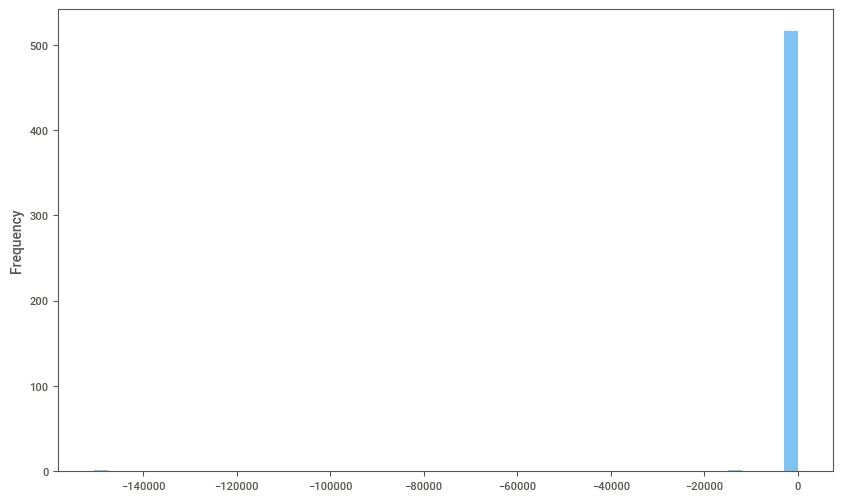

In [197]:
# Eliminate outliers from percentual_valor_final
df_plot = df_aditivos.copy()

# Calculate the mean of percentual_valor_final by mododisputa rounded to 2 decimal places and the counts
print((df_plot.groupby('mododisputa')['percentual_diferenca_valor'].mean().round(2)).astype(str) + ' (' + df_plot.groupby('mododisputa')['diferenca_valor'].count().astype(str) + ')')
print((df_plot.groupby('disputaaberto')['percentual_diferenca_valor'].mean().round(2)).astype(str) + ' (' + df_plot.groupby('disputaaberto')['diferenca_valor'].count().astype(str) + ')')

# Calculate and plot the distribution of percentual_valor_final
df_plot['percentual_diferenca_valor'].plot.hist(bins=50, figsize=(10,6), alpha=0.5)

In [175]:
# Export dataframe to CSV and Excel, all quoted
filename = 'output/resultado-rdc-aditivos'
df_aditivos.to_csv(f'{filename}.csv', index=False, quoting=1)
df_aditivos.to_excel(f'{filename}.xlsx', index=False)